# Ï†ÑÏÑ§Ïùò Ìè¨ÏºìÎ™¨ Íµ¨ÌïòÍ∏∞

- Ï∫êÍ∏Ä Îç∞Ïù¥ÎçîÏÖã (https://www.kaggle.com/datasets/abcsds/pokemon/data)

## 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print('Ïäù=3')

Ïäù=3


In [2]:
import os
csv_path = os.getenv("HOME") +"/aiffel/pokemon_eda/data/Pokemon.csv"
original_data = pd.read_csv(csv_path)
print('Ïäù=3')

Ïäù=3


In [3]:
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

In [4]:
# Ï†ÑÏÑ§Ïùò Ìè¨ÏºìÎ™¨ Îç∞Ïù¥ÌÑ∞ÏÖã
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


#                 Name    Type 1    Type 2  Total   HP  Attack  Defense  \
0  144             Articuno       Ice    Flying    580   90      85      100   
1  145               Zapdos  Electric    Flying    580   90      90       85   
2  146              Moltres      Fire    Flying    580   90     100       90   
3  150               Mewtwo   Psychic       NaN    680  106     110       90   
4  150  MewtwoMega Mewtwo X   Psychic  Fighting    780  106     190      100   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       95      125     85           1       True  
1      125       90    100           1       True  
2      125       85     90           1       True  
3      154       90    130           1       True  
4      154      100    130           1       True

In [5]:
# Q. ÏùºÎ∞ò Ìè¨ÏºìÎ™¨Ïùò Îç∞Ïù¥ÌÑ∞ÏÖãÎèÑ ÎßåÎì§Ïñ¥Î¥ÖÏãúÎã§.
ordinary = pokemon[pokemon['Legendary']== False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

(735, 13)


#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

## 2. EDA

### 1) Missing Values

In [6]:
pokemon.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [7]:
print(len(pokemon.columns))
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [8]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


### 2) ID, Name

In [9]:
# Î™á Ï¢ÖÎ•òÏùò #ÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÎäîÏßÄ - Ï†ÑÏ≤¥Îç∞Ïù¥ÌÑ∞Í∞Ä 800Í∞úÏù∏Îç∞ 721Ïù¥ÎùºÎ©¥ Ï§ëÎ≥µÏù¥ ÏûàÎã§Îäî Îúª
# Ï§ëÎ≥µÎêú Îç∞Ïù¥ÌÑ∞Î•º Ï†úÏô∏Ìïú Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞Î•º Íµ¨ÌïòÎäî Î∞©Î≤ï
len(set(pokemon['#']))

721

In [10]:
#Í∞ôÏùÄ Î¶¨ÏûêÎ™ΩÏóêÏÑú ÏãúÏûëÌï¥ÏÑú ÏßÑÌôîÌïú Ïï†Îì§ÏùÄ Í∞ôÏùÄ #ÎùºÎäî Í±∏ ÌôïÏù∏ (6ÏùÄ ÏòàÏãú)
pokemon[pokemon['#'] == 6]

#                       Name Type 1  Type 2  Total  HP  Attack  Defense  \
6  6                  Charizard   Fire  Flying    534  78      84       78   
7  6  CharizardMega Charizard X   Fire  Dragon    634  78     130      111   
8  6  CharizardMega Charizard Y   Fire  Flying    634  78     104       78   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
6      109       85    100           1      False  
7      130       85    100           1      False  
8      159      115    100           1      False

In [11]:
#Ïú†ÏùºÌïú Îç∞Ïù¥ÌÑ∞Ïùò Í∞ØÏàòÎ•º ÌôïÏù∏ÌïòÎäî Î∞©Î≤ïÏùÄ ÎëêÍ∞ÄÏßÄÏù¥Îã§ 
#1. pokemon['Name'].nunique()
len(set(pokemon['Name']))

800

### 3) ÏÜçÏÑ± (Type1, Type 2)

In [12]:
#Í∞Å ÏÜçÏÑ±Ïùò Ï¢ÖÎ•ò
len(list(set(pokemon['Type 1']))), len(list(set(pokemon['Type 2'])))

(18, 19)

In [13]:
#type 2 Í∞Ä type 1 Î≥¥Îã§ ÎßéÏùÄÍ≤å Î≠îÏßÄ Î≥¥Í∏∞
set(pokemon['Type 2']) - set(pokemon['Type 1'])

{nan}

In [14]:
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

18
['Fire', 'Water', 'Ground', 'Ghost', 'Psychic', 'Poison', 'Dragon', 'Ice', 'Flying', 'Fairy', 'Fighting', 'Normal', 'Rock', 'Electric', 'Dark', 'Steel', 'Bug', 'Grass']


In [15]:
pokemon["Type 2"].isna().sum()

386

### Type1 Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨

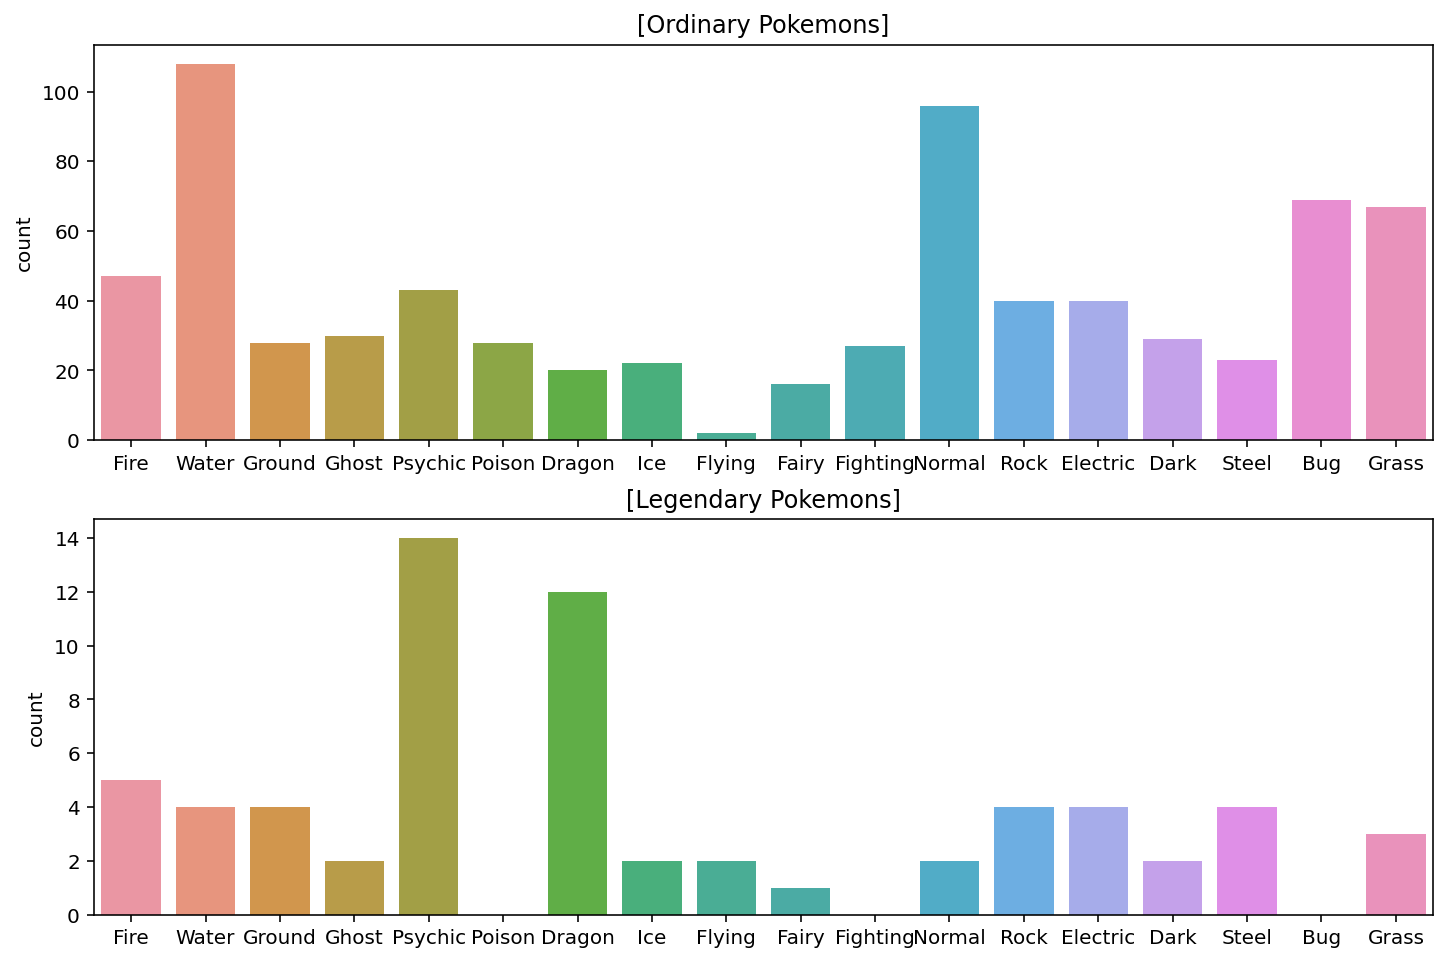

In [16]:
plt.figure(figsize=(12, 8))  # ÌôîÎ©¥ Ìï¥ÏÉÅÎèÑÏóê Îî∞Îùº Í∑∏ÎûòÌîÑ ÌÅ¨Í∏∞Î•º Ï°∞Ï†ïÌï¥ Ï£ºÏÑ∏Ïöî.

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

* ordinaryÏóêÎäî water, normal, bug ÏÜçÏÑ±, legendaryÏóêÎäî psychic, dragonÏÜçÏÑ±Ïù¥ ÎßéÎã§

In [17]:
# Type1Î≥ÑÎ°ú LegendaryÏùò ÎπÑÏú®ÏùÑ Î≥¥Ïó¨Ï£ºÎäî ÌîºÎ≤ó ÌÖåÏù¥Î∏î
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

Legendary
Type 1             
Flying     0.500000
Dragon     0.375000
Psychic    0.245614
Steel      0.148148
Ground     0.125000
Fire       0.096154
Electric   0.090909
Rock       0.090909
Ice        0.083333
Dark       0.064516
Ghost      0.062500
Fairy      0.058824
Grass      0.042857
Water      0.035714
Normal     0.020408
Poison     0.000000
Fighting   0.000000
Bug        0.000000

* ÏÜçÏÑ± 1ÏóêÏÑúÎäî legendary Ìè¨ÏºìÎ™¨Ïùò FlyingÏùò ÏÜçÏÑ±Ïù¥ 50% Î°ú Í∞ÄÏû• ÎÜíÎã§

### Type 2 Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨

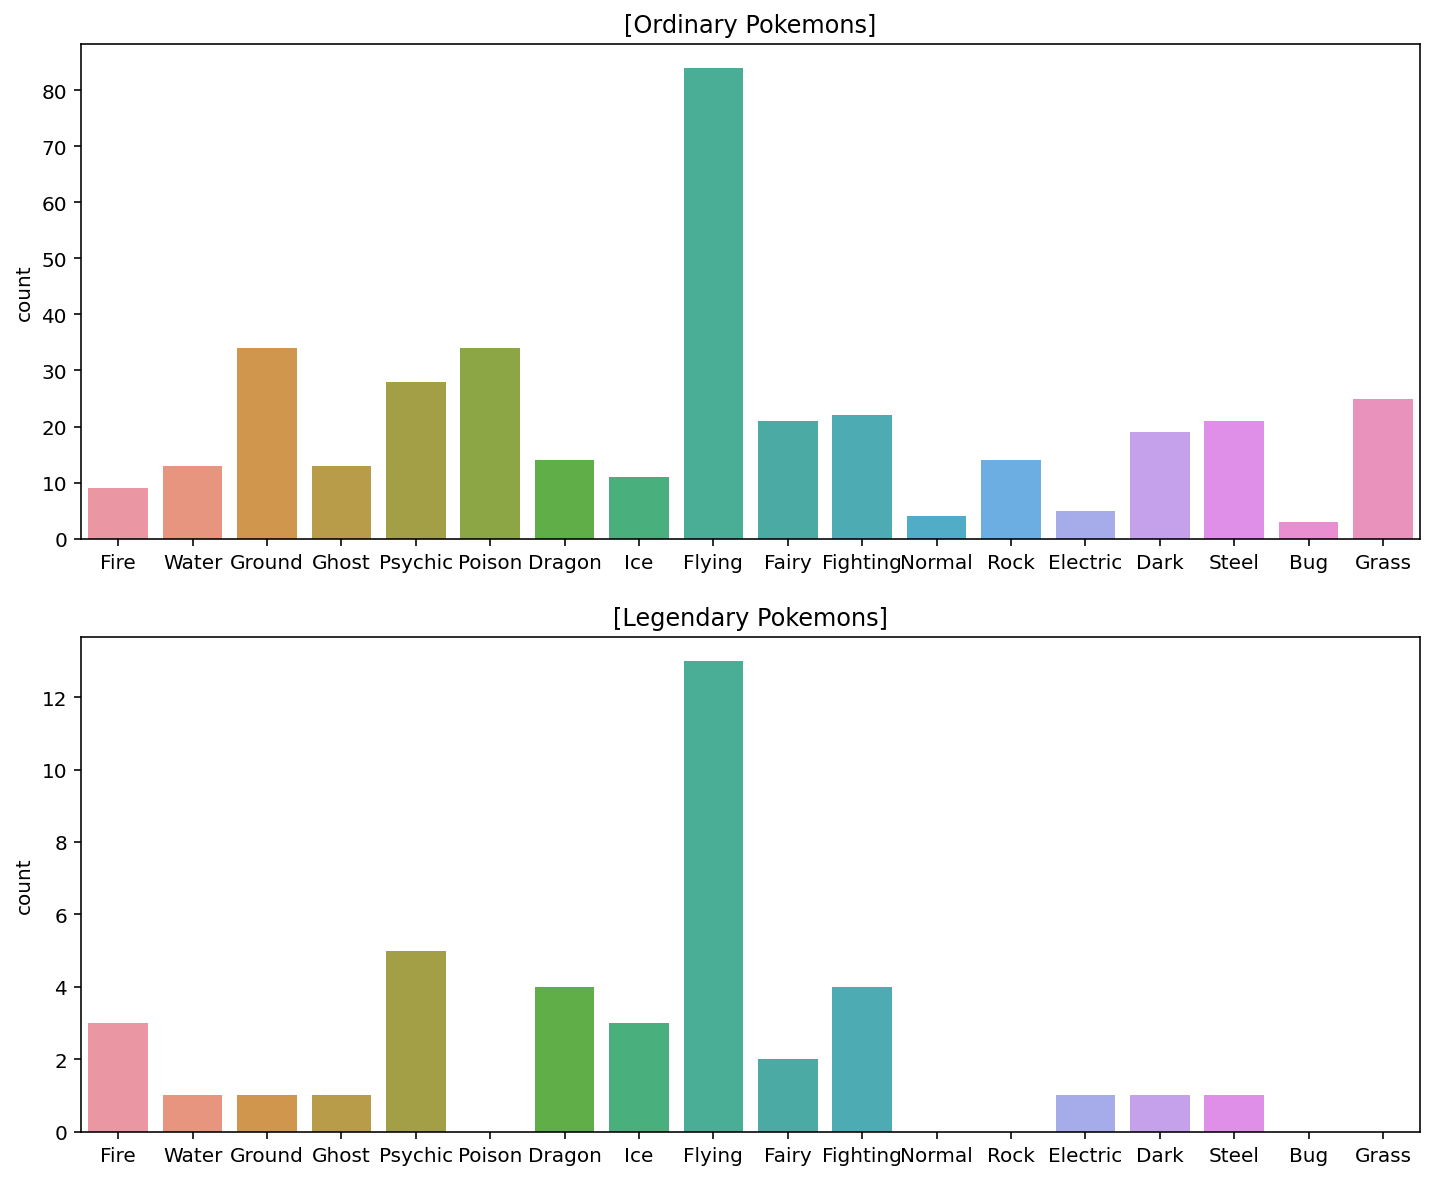

In [18]:
# Q. ÏïÑÎûò ÏΩîÎìúÏùò ÎπàÏπ∏ÏùÑ Ï±ÑÏõåÏ£ºÏÑ∏Ïöî.
plt.figure(figsize=(12, 10))  # ÌôîÎ©¥ Ìï¥ÏÉÅÎèÑÏóê Îî∞Îùº Í∑∏ÎûòÌîÑ ÌÅ¨Í∏∞Î•º Ï°∞Ï†ïÌï¥ Ï£ºÏÑ∏Ïöî.

plt.subplot(211)
sns.countplot(data=ordinary, x='Type 2', order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x='Type 2', order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

* Flying Ïù¥ ÏïïÎèÑÏ†ÅÏúºÎ°ú ÎßéÎã§. Í∏∞Î≥∏Ï†ÅÏúºÎ°ú ÎëêÎ≤àÏß∏ Ïä§ÌÇ¨ÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÏúºÎ©¥ Í∑∏Í±¥ FlyingÏù∏ Í≤ΩÏö∞Í∞Ä ÎßéÎã§Îäî Îúª

In [19]:
# Q. Type 2Ïóê ÎåÄÌï¥ÏÑúÎèÑ ÌîºÎ≤ó ÌÖåÏù¥Î∏îÏùÑ ÎßåÎì§Ïñ¥Î¥ÖÏãúÎã§.
pd.pivot_table(pokemon, index='Type 2', values='Legendary').sort_values(by=['Legendary'], ascending= False)

Legendary
Type 2             
Fire       0.250000
Dragon     0.222222
Ice        0.214286
Electric   0.166667
Fighting   0.153846
Psychic    0.151515
Flying     0.134021
Fairy      0.086957
Water      0.071429
Ghost      0.071429
Dark       0.050000
Steel      0.045455
Ground     0.028571
Rock       0.000000
Bug        0.000000
Poison     0.000000
Normal     0.000000
Grass      0.000000

* ÏÜçÏÑ± 2ÏóêÏÑúÎäî legendary Ìè¨ÏºìÎ™¨Ïùò Fire ÏÜçÏÑ±Ïù¥ 25% Î°ú Í∞ÄÏû• ÎÜíÎã§

### 4) Total

In [20]:
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

* ÏñòÎÑ§Îì§Ïùò Ìï©Ïù¥ ÏßÑÏßúÎ°ú Total Ïù¥ ÎßûÎäîÏßÄ Í≤ÄÏ¶ùÎ∂ÄÌÑ∞ Ìï¥Î≥∏Îã§

In [21]:
#Ï≤´Î≤àÏß∏ Ìè¨ÏºìÎ™¨Ïóê ÎåÄÌïú Í≤ÄÏ¶ù
print("#0 pokemon: ", pokemon.loc[0, "Name"])
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", list(pokemon.loc[0, stats]))
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#0 pokemon:  Bulbasaur
total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


In [22]:
# Q. 'pokemon['Total'].values'ÏôÄ 'pokemon[stats].valuesÏùò Ï¥ùÌï©'Ïù¥ Í∞ôÏùÄ Ìè¨ÏºìÎ™¨Ïùò ÏàòÎ•º ÌôïÏù∏Ìï¥Î¥ÖÏãúÎã§.
len(pokemon['Total'].values == pokemon[stats].values.sum(axis=1))

800

* Ï†ÑÎ∂Ä Îã§ totalÏù¥Îûë ÏùºÏπòÌïúÎã§.

### Total Í∞íÏóê Îî∞Î•∏ Î∂ÑÌè¨ plot

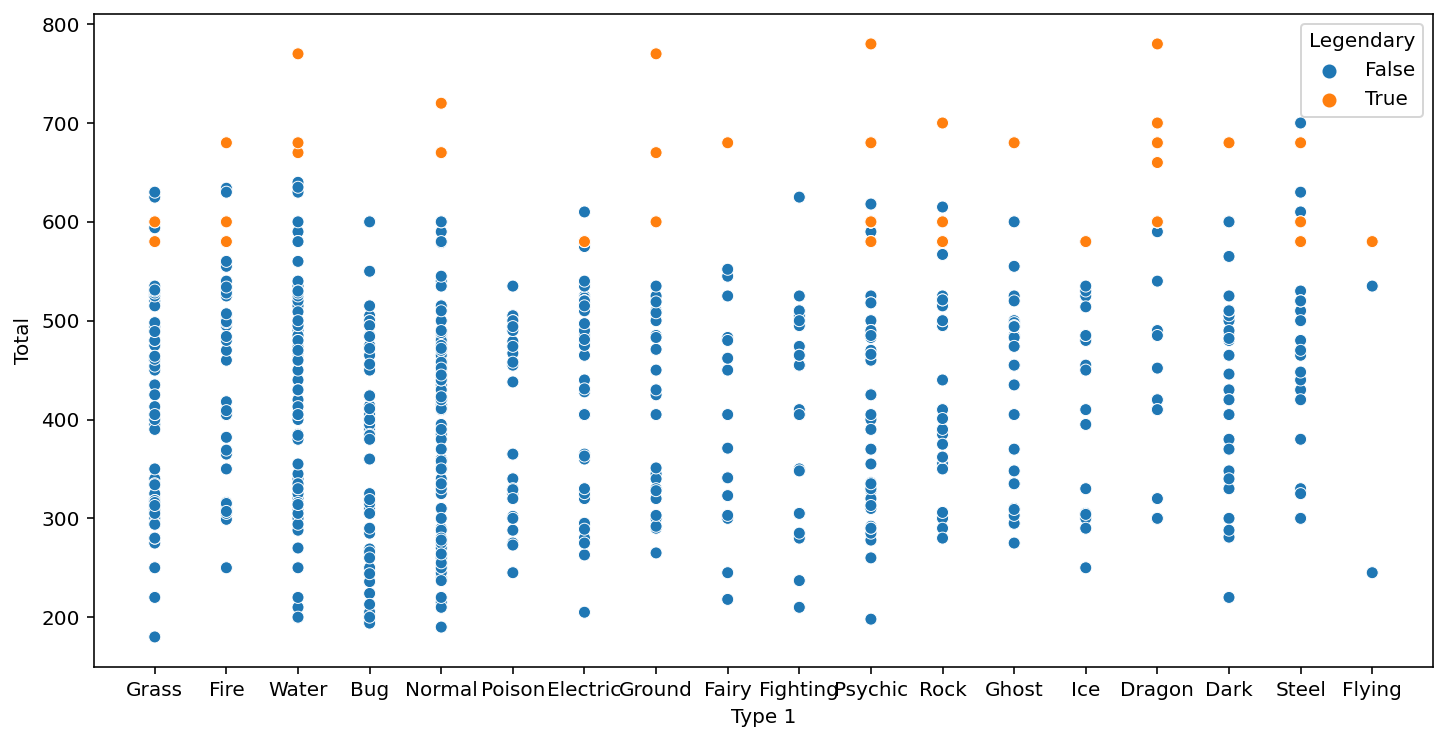

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

sns.scatterplot(data=pokemon, x='Type 1', y='Total', hue='Legendary')
plt.show()

* legendary Ìè¨ÏºìÎ™¨Ïùò Type Ïóê Îî∞Îùº Î¥§ÏùÑ Îïå, Îçî Stat total Ïù¥ ÎÜíÎã§Îäî Í±∏ Ïïå Ïàò ÏûàÎã§

### 5) ÏÑ∏Î∂Ä stats

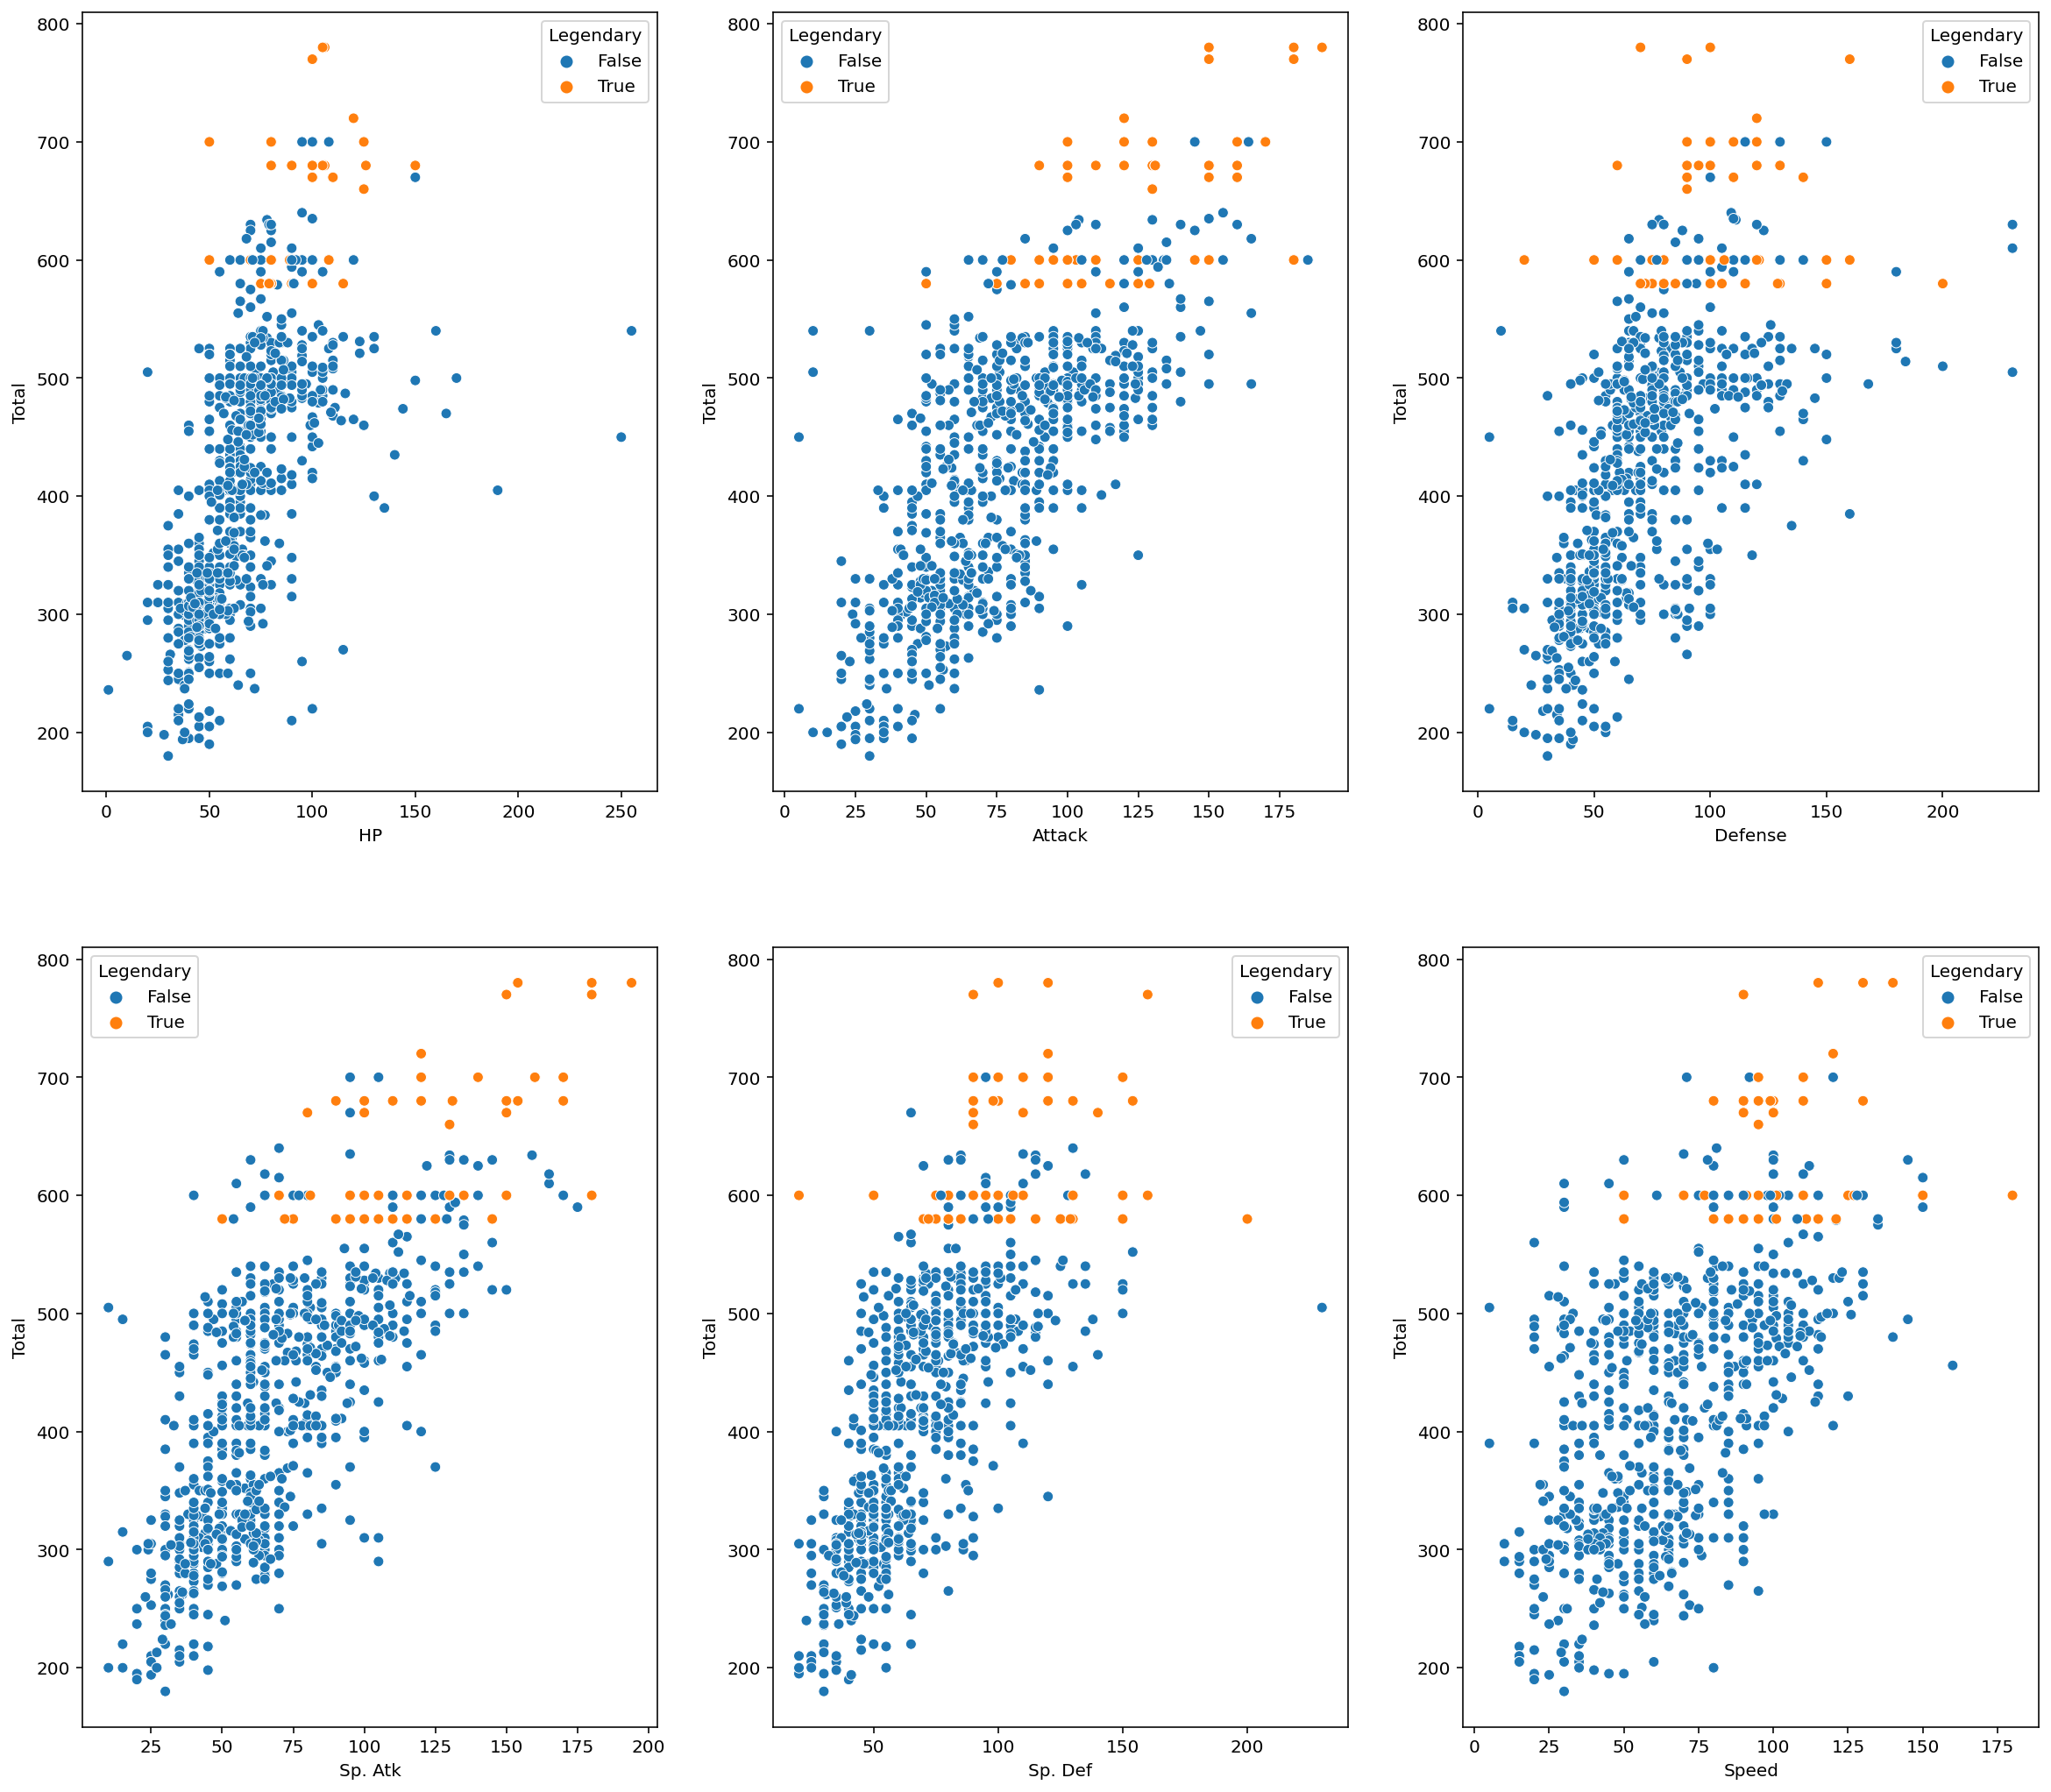

In [24]:
# Í∞ÅÍ∞ÅÏùò Ïä§ÌÉØÏóê ÎåÄÌïú scatter plotÏùÑ 6Í∞úÏùò subplotÏúºÎ°ú ÌëúÌòÑÌï©ÎãàÎã§.

fig, axes = plt.subplots(2,3)
fig.set_size_inches(20, 18)  # ÌôîÎ©¥ Ìï¥ÏÉÅÎèÑÏóê Îî∞Îùº Í∑∏ÎûòÌîÑ ÌÅ¨Í∏∞Î•º Ï°∞Ï†ïÌï¥ Ï£ºÏÑ∏Ïöî.

# "HP" Ïä§ÌÉØÏùò scatter plot
sns.scatterplot(data=pokemon, y='Total', x="HP", hue="Legendary", ax=axes[0,0])

# "Attack" Ïä§ÌÉØÏùò scatter plot
sns.scatterplot(data=pokemon, y='Total', x='Attack', hue='Legendary', ax=axes[0,1])

# "Defense" Ïä§ÌÉØÏùò scatter plot
sns.scatterplot(data=pokemon, y='Total', x='Defense', hue='Legendary', ax=axes[0,2])

# "Sp. Atk" Ïä§ÌÉØÏùò scatter plot
sns.scatterplot(data=pokemon, y='Total', x='Sp. Atk', hue='Legendary', ax=axes[1,0])

# "Sp. Def" Ïä§ÌÉØÏùò scatter plot
sns.scatterplot(data=pokemon, y='Total', x='Sp. Def', hue='Legendary', ax=axes[1,1])

# "Speed" Ïä§ÌÉØÏùò scatter plot
sns.scatterplot(data=pokemon, y='Total', x='Speed', hue='Legendary', ax=axes[1,2])

plt.show()

### 6) Generation

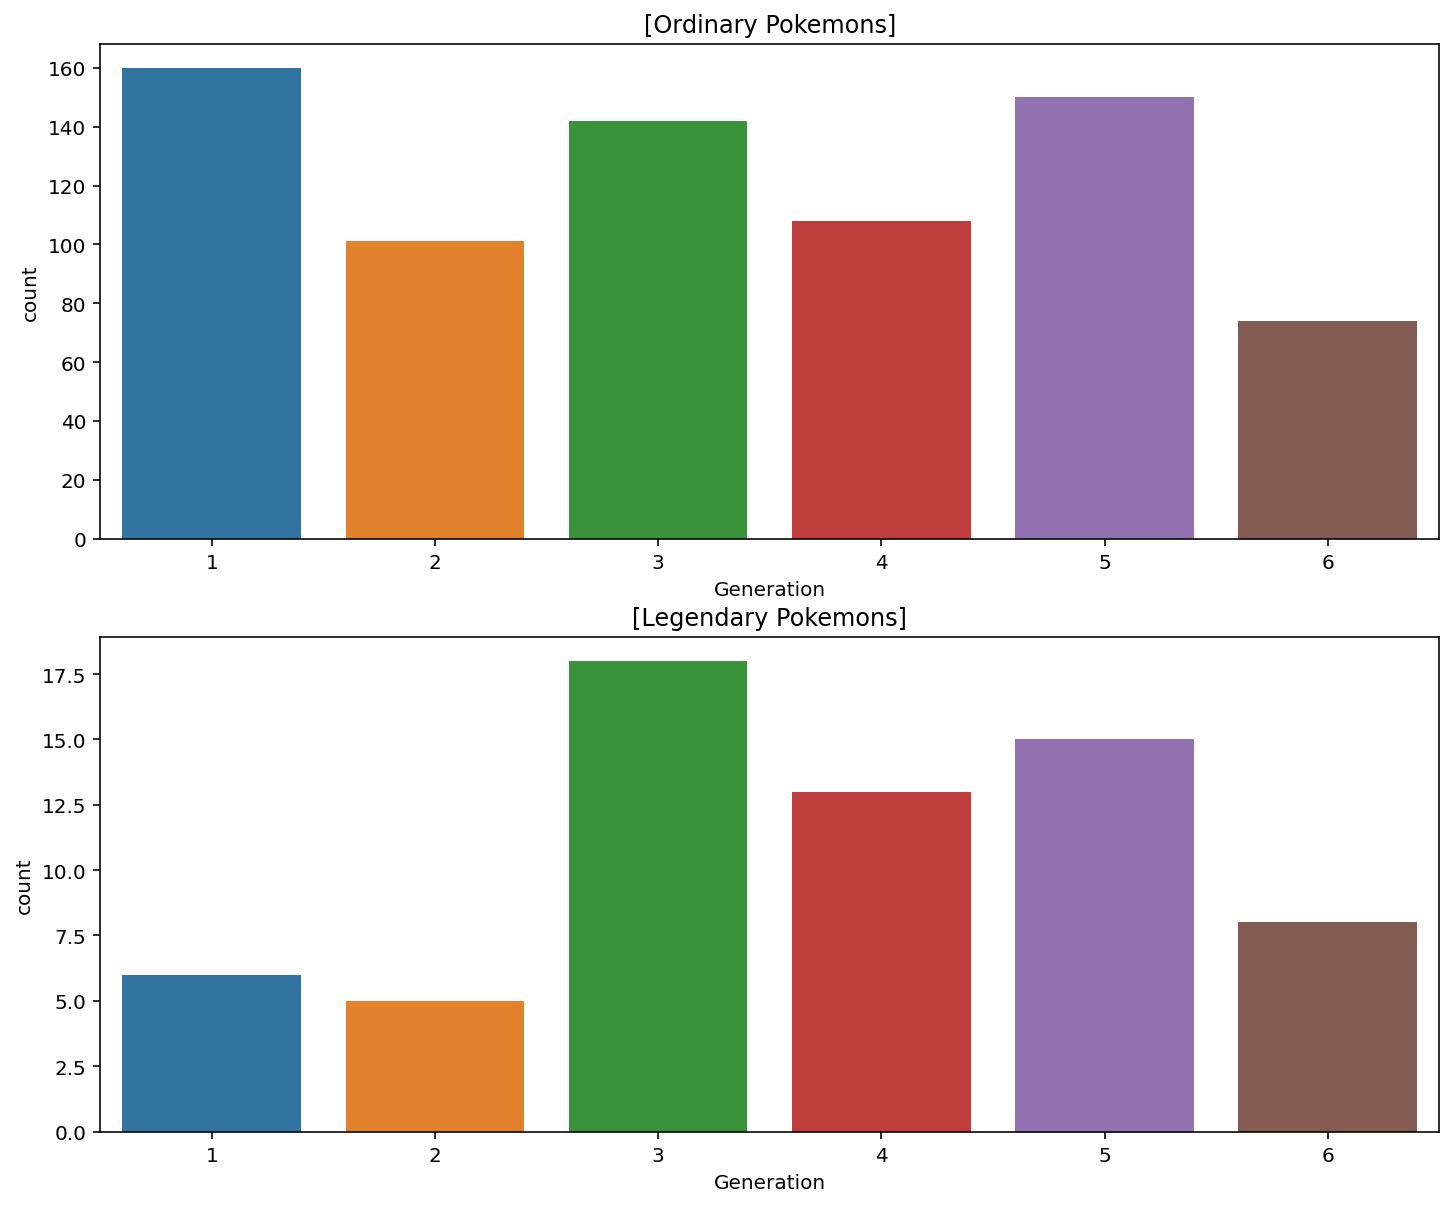

In [25]:
plt.figure(figsize=(12, 10))   # ÌôîÎ©¥ Ìï¥ÏÉÅÎèÑÏóê Îî∞Îùº Í∑∏ÎûòÌîÑ ÌÅ¨Í∏∞Î•º Ï°∞Ï†ïÌï¥ Ï£ºÏÑ∏Ïöî.

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation")
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Generation")
plt.title("[Legendary Pokemons]")
plt.show()

## 3. ÌÜµÍ≥ÑÍ∞í

### 1) Total

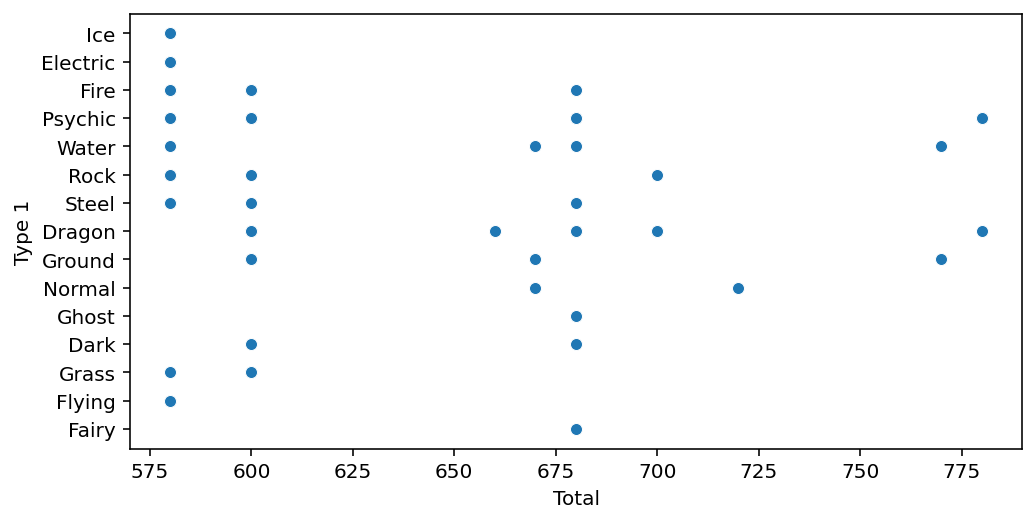

In [26]:
#Ï†ÑÏÑ§Ìè¨ÏºìÎ™¨Ïùò Total stat Í∞í
plt.figure(figsize=(8,4))

sns.scatterplot(data=legendary, y='Type 1', x='Total')
plt.show()

* Ï†ÑÏÑ§Ìè¨ÏºìÎ™¨ Ï†ÑÏ≤¥ Ïä§ÌÉØÏù¥ ÌäπÏ†ï Í∞íÏóêÎßå Î™∞Î†§ÏûàÎã§

In [27]:
legendary["Total"].unique().tolist()

[580, 680, 780, 600, 700, 670, 770, 720, 660]

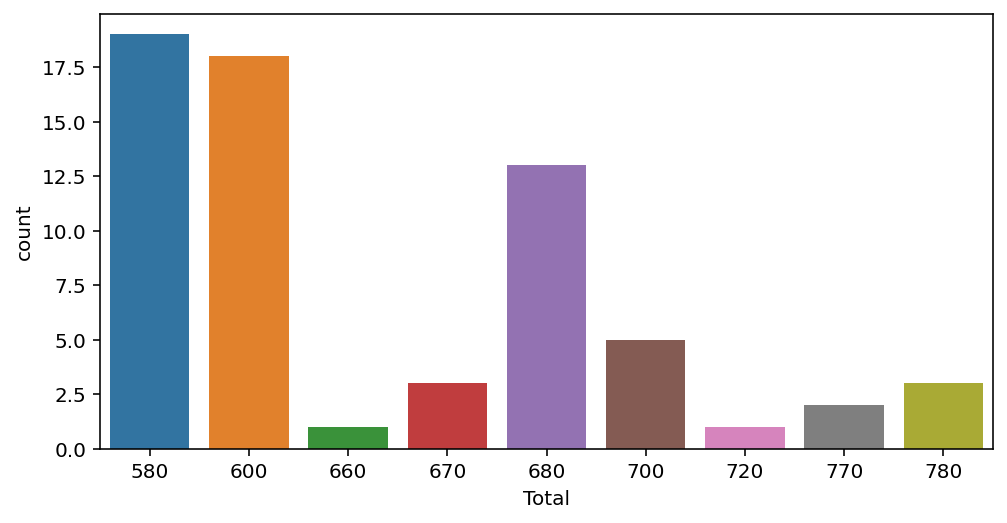

In [28]:
plt.figure(figsize=(8,4))

sns.countplot(data=legendary, x='Total')
plt.show()

In [29]:
round(65/9, 2)

7.22

* Ï†ÑÏ≤¥ 65ÎßàÎ¶¨Ïùò Ï†ÑÏÑ§Ìè¨ÏºìÎ™¨ Ï§ë 9Í∞úÏùò totalÍ∞íÎßå Í∞ÄÏßÑÎã§Îäî Í±¥, ÏïΩ 7.22ÎßàÎ¶¨Í∞Ä Í∞ôÏùÄ total statÏùÑ Í∞ÄÏßÑÎã§Îäî Îßê

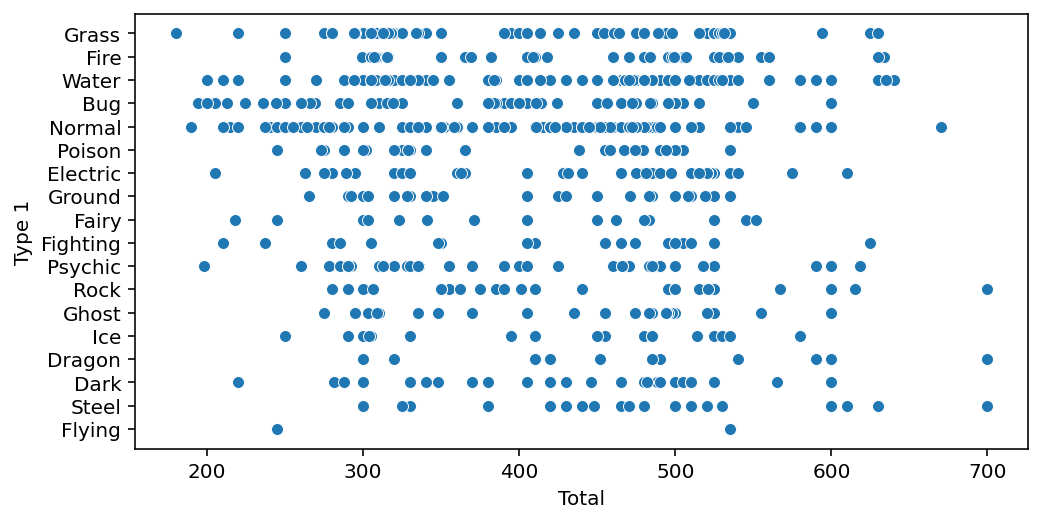

In [30]:
#ordinary Ïùò Í≤ΩÏö∞
plt.figure(figsize=(8,4))

sns.scatterplot(data=ordinary, y='Type 1', x='Total')
plt.show()

In [31]:
print(sorted(list(set(ordinary['Total']))))

[180, 190, 194, 195, 198, 200, 205, 210, 213, 215, 218, 220, 224, 236, 237, 240, 244, 245, 250, 251, 253, 255, 260, 262, 263, 264, 265, 266, 269, 270, 273, 275, 278, 280, 281, 285, 288, 289, 290, 292, 294, 295, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 313, 314, 315, 316, 318, 319, 320, 323, 325, 328, 329, 330, 334, 335, 336, 340, 341, 345, 348, 349, 350, 351, 352, 355, 358, 360, 362, 363, 365, 369, 370, 371, 375, 380, 382, 384, 385, 390, 395, 400, 401, 405, 409, 410, 411, 413, 414, 415, 418, 420, 423, 424, 425, 428, 430, 431, 435, 438, 440, 442, 445, 446, 448, 450, 452, 454, 455, 456, 458, 460, 461, 462, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 475, 479, 480, 481, 482, 483, 484, 485, 487, 488, 489, 490, 494, 495, 497, 498, 499, 500, 505, 507, 508, 509, 510, 514, 515, 518, 519, 520, 521, 523, 525, 528, 530, 531, 534, 535, 540, 545, 550, 552, 555, 560, 565, 567, 575, 579, 580, 590, 594, 600, 610, 615, 618, 625, 630, 634, 635, 640, 670, 700]


In [32]:
len((sorted(list(set(ordinary["Total"])))))

195

In [33]:
round(735/195, 2)

3.77

* Ï†ÑÏÑ§Ìè¨ÏºìÎ™¨Îßå Í∞ñÍ≥† ÏûàÎäî totalÍ∞íÏù¥ ÏûàÎã§ (680, 780, 770, 720, 660)

### 2) Ïù¥Î¶Ñ

In [34]:
legendary

#                 Name    Type 1    Type 2  Total   HP  Attack  Defense  \
0   144             Articuno       Ice    Flying    580   90      85      100   
1   145               Zapdos  Electric    Flying    580   90      90       85   
2   146              Moltres      Fire    Flying    580   90     100       90   
3   150               Mewtwo   Psychic       NaN    680  106     110       90   
4   150  MewtwoMega Mewtwo X   Psychic  Fighting    780  106     190      100   
..  ...                  ...       ...       ...    ...  ...     ...      ...   
60  719              Diancie      Rock     Fairy    600   50     100      150   
61  719  DiancieMega Diancie      Rock     Fairy    700   50     160      110   
62  720  HoopaHoopa Confined   Psychic     Ghost    600   80     110       60   
63  720   HoopaHoopa Unbound   Psychic      Dark    680   80     160       60   
64  721            Volcanion      Fire     Water    600   80     110      120   

    Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0        95      125     85           1       True  
1       125       90    100           1       True  
2       125       85     90           1       True  
3       154       90    130           1       True  
4       154      100    130           1       True  
..      ...      ...    ...         ...        ...  
60      100      150     50           6       True  
61      160      110    110           6       True  
62      150      130     70           6       True  
63      170      130     80           6       True  
64      130       90     70           6       True  

[65 rows x 13 columns]

### ÌäπÏ†ï Îã®Ïñ¥Í∞Ä Í≥µÌÜµÏ†ÅÏúºÎ°ú Îì§Ïñ¥Í∞ÄÎäî Ïù¥Î¶Ñ

In [35]:
##ÌäπÏ†ï Îã®Ïñ¥Í∞Ä Îì§Ïñ¥Í∞ÄÏûàÎäî Ïù¥Î¶ÑÏù¥ ÏûàÎäîÍ∞Ä  (ÎÖ∏ÎìúÏóêÏÑú Ï£ºÏñ¥ÏßÑ ÏΩîÎìú)
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

#                      Name    Type 1    Type 2  Total   HP  Attack  \
0   150                    Mewtwo   Psychic       NaN    680  106     110   
1   150       MewtwoMega Mewtwo X   Psychic  Fighting    780  106     190   
2   150       MewtwoMega Mewtwo Y   Psychic       NaN    780  106     150   
3   380                    Latias    Dragon   Psychic    600   80      80   
4   380         LatiasMega Latias    Dragon   Psychic    700   80     100   
5   381                    Latios    Dragon   Psychic    600   80      90   
6   381         LatiosMega Latios    Dragon   Psychic    700   80     130   
7   382                    Kyogre     Water       NaN    670  100     100   
8   382       KyogrePrimal Kyogre     Water       NaN    770  100     150   
9   383                   Groudon    Ground       NaN    670  100     150   
10  383     GroudonPrimal Groudon    Ground      Fire    770  100     180   
11  384                  Rayquaza    Dragon    Flying    680  105     150   
12  384     RayquazaMega Rayquaza    Dragon    Flying    780  105     180   
13  386        DeoxysNormal Forme   Psychic       NaN    600   50     150   
14  386        DeoxysAttack Forme   Psychic       NaN    600   50     180   
15  386       DeoxysDefense Forme   Psychic       NaN    600   50      70   
16  386         DeoxysSpeed Forme   Psychic       NaN    600   50      95   
17  641   TornadusIncarnate Forme    Flying       NaN    580   79     115   
18  641     TornadusTherian Forme    Flying       NaN    580   79     100   
19  642  ThundurusIncarnate Forme  Electric    Flying    580   79     115   
20  642    ThundurusTherian Forme  Electric    Flying    580   79     105   
21  645   LandorusIncarnate Forme    Ground    Flying    600   89     125   
22  645     LandorusTherian Forme    Ground    Flying    600   89     145   
23  646                    Kyurem    Dragon       Ice    660  125     130   
24  646        KyuremBlack Kyurem    Dragon       Ice    700  125     170   
25  646        KyuremWhite Kyurem    Dragon       Ice    700  125     120   

    Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0        90      154       90    130           1       True  
1       100      154      100    130           1       True  
2        70      194      120    140           1       True  
3        90      110      130    110           3       True  
4       120      140      150    110           3       True  
5        80      130      110    110           3       True  
6       100      160      120    110           3       True  
7        90      150      140     90           3       True  
8        90      180      160     90           3       True  
9       140      100       90     90           3       True  
10      160      150       90     90           3       True  
11       90      150       90     95           3       True  
12      100      180      100    115           3       True  
13       50      150       50    150           3       True  
14       20      180       20    150           3       True  
15      160       70      160     90           3       True  
16       90       95       90    180           3       True  
17       70      125       80    111           5       True  
18       80      110       90    121           5       True  
19       70      125       80    111           5       True  
20       70      145       80    101           5       True  
21       90      115       80    101           5       True  
22       90      105       80     91           5       True  
23       90      130       90     95           5       True  
24      100      120       90     95           5       True  
25       90      170      100     95           5       True

### üí°Í∑ºÎç∞ ÏúÑ Î∞©Î≤ïÏùÄ Í∑∏ÎÉ• Ï¢Ä ÎÖ∏Í∞ÄÎã§Í∞Ä ÏïÑÎãåÍ∞Ä Ïã∂Í≥† ÎπÑÌö®Ïú®Ï†ÅÏù¥Îã§.  
ÏïÑÍπå "#"Ïù¥ Í∞ôÏùÄ Ïï†Îì§ÏùÄ, Í∞ôÏùÄ Î≥∏Ï≤¥ÏóêÏÑú ÏßÑÌôîÌïú Í±∞ÏòÄÏúºÎãàÍπå, Í∑∏Í±∏ Ïù¥Ïö©Ìï¥Î≥¥Ïûê.  
Î≥¥ÎãàÍπå ÎÖ∏ÎìúÏóêÏÑú Ï§Ä ÏΩîÎìúÏùò Îç∞Ïù¥ÌÑ∞ Í≤∞Í≥ºÍ∞íÏùÄ Ïò§ÌûàÎ†§ "#"Í∞í 487, 492, 719, 720Îì± Îπ†Ï†∏ÏûàÎäî Í±∏ Î∞úÍ≤¨ÌïòÏòÄÎã§! ...„Öá_„Öá???

In [36]:
names = legendary[legendary.duplicated('#', keep=False)].reset_index(drop=True)
names

#Ïó¨Í∏∞ÏÑú keep Îß§Í∞úÎ≥ÄÏàòÎäî Ï§ëÎ≥µÎêú ÌñâÏùÑ Ïú†ÏßÄÌï†ÏßÄ Ïó¨Î∂ÄÎ•º ÏßÄÏ†ïÌïúÎã§ 
# keep='first': Ï≤´ Î≤àÏß∏ Ï§ëÎ≥µ ÌñâÏùÑ Ïú†ÏßÄÌïòÍ≥† ÎÇòÎ®∏ÏßÄ Ï§ëÎ≥µ ÌñâÏùÑ Ï†úÍ±∞Ìï©ÎãàÎã§.
# keep='last': ÎßàÏßÄÎßâ Ï§ëÎ≥µ ÌñâÏùÑ Ïú†ÏßÄÌïòÍ≥† ÎÇòÎ®∏ÏßÄ Ï§ëÎ≥µ ÌñâÏùÑ Ï†úÍ±∞Ìï©ÎãàÎã§.
# keep=False: Î™®Îì† Ï§ëÎ≥µ ÌñâÏùÑ Ïú†ÏßÄÌïòÍ≥† Î™®Îì† Ï§ëÎ≥µÏù¥ Î∞úÏÉùÌïú ÌñâÏùÑ ÏÑ†ÌÉùÌï©ÎãàÎã§.

#                      Name    Type 1    Type 2  Total   HP  Attack  \
0   150                    Mewtwo   Psychic       NaN    680  106     110   
1   150       MewtwoMega Mewtwo X   Psychic  Fighting    780  106     190   
2   150       MewtwoMega Mewtwo Y   Psychic       NaN    780  106     150   
3   380                    Latias    Dragon   Psychic    600   80      80   
4   380         LatiasMega Latias    Dragon   Psychic    700   80     100   
5   381                    Latios    Dragon   Psychic    600   80      90   
6   381         LatiosMega Latios    Dragon   Psychic    700   80     130   
7   382                    Kyogre     Water       NaN    670  100     100   
8   382       KyogrePrimal Kyogre     Water       NaN    770  100     150   
9   383                   Groudon    Ground       NaN    670  100     150   
10  383     GroudonPrimal Groudon    Ground      Fire    770  100     180   
11  384                  Rayquaza    Dragon    Flying    680  105     150   
12  384     RayquazaMega Rayquaza    Dragon    Flying    780  105     180   
13  386        DeoxysNormal Forme   Psychic       NaN    600   50     150   
14  386        DeoxysAttack Forme   Psychic       NaN    600   50     180   
15  386       DeoxysDefense Forme   Psychic       NaN    600   50      70   
16  386         DeoxysSpeed Forme   Psychic       NaN    600   50      95   
17  487     GiratinaAltered Forme     Ghost    Dragon    680  150     100   
18  487      GiratinaOrigin Forme     Ghost    Dragon    680  150     120   
19  492         ShayminLand Forme     Grass       NaN    600  100     100   
20  492          ShayminSky Forme     Grass    Flying    600  100     103   
21  641   TornadusIncarnate Forme    Flying       NaN    580   79     115   
22  641     TornadusTherian Forme    Flying       NaN    580   79     100   
23  642  ThundurusIncarnate Forme  Electric    Flying    580   79     115   
24  642    ThundurusTherian Forme  Electric    Flying    580   79     105   
25  645   LandorusIncarnate Forme    Ground    Flying    600   89     125   
26  645     LandorusTherian Forme    Ground    Flying    600   89     145   
27  646                    Kyurem    Dragon       Ice    660  125     130   
28  646        KyuremBlack Kyurem    Dragon       Ice    700  125     170   
29  646        KyuremWhite Kyurem    Dragon       Ice    700  125     120   
30  719                   Diancie      Rock     Fairy    600   50     100   
31  719       DiancieMega Diancie      Rock     Fairy    700   50     160   
32  720       HoopaHoopa Confined   Psychic     Ghost    600   80     110   
33  720        HoopaHoopa Unbound   Psychic      Dark    680   80     160   

    Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0        90      154       90    130           1       True  
1       100      154      100    130           1       True  
2        70      194      120    140           1       True  
3        90      110      130    110           3       True  
4       120      140      150    110           3       True  
5        80      130      110    110           3       True  
6       100      160      120    110           3       True  
7        90      150      140     90           3       True  
8        90      180      160     90           3       True  
9       140      100       90     90           3       True  
10      160      150       90     90           3       True  
11       90      150       90     95           3       True  
12      100      180      100    115           3       True  
13       50      150       50    150           3       True  
14       20      180       20    150           3       True  
15      160       70      160     90           3       True  
16       90       95       90    180           3       True  
17      120      100      120     90           4       True  
18      100      120      100     90           4       True  
19      100      100      100    100           4       True  
20      

### üí° ÌäπÏ†ï Î¨∏Ïûê Îì§Ïñ¥Í∞Ñ Ïó¥ Ï∞æÎäî Î∞©Î≤ï
ÎÖ∏ÎìúÏóêÏÑú Ï£ºÏñ¥ÏßÑ ÏΩîÎìúÎäî Í∑∏ÎÉ• ÎÖ∏Í∞ÄÎã§(?)Ïù∏Îç∞ Ï°∞Í∏à Î≥ÄÌòïÌï¥ÏÑú Îçî Ïä§ÎßàÌä∏ÌïòÍ≤å ÌíÄÏñ¥Î≥¥Î†§Í≥† ÏãúÎèÑÌï¥Î¥§Îã§ (contains Ìï®Ïàò)

In [37]:
# formes
# formes = names[13:23] (Ï£ºÏñ¥ÏßÑ ÏΩîÎìú)

formes = names[names['Name'].str.contains('Forme')]
formes

#                      Name    Type 1  Type 2  Total   HP  Attack  \
13  386        DeoxysNormal Forme   Psychic     NaN    600   50     150   
14  386        DeoxysAttack Forme   Psychic     NaN    600   50     180   
15  386       DeoxysDefense Forme   Psychic     NaN    600   50      70   
16  386         DeoxysSpeed Forme   Psychic     NaN    600   50      95   
17  487     GiratinaAltered Forme     Ghost  Dragon    680  150     100   
18  487      GiratinaOrigin Forme     Ghost  Dragon    680  150     120   
19  492         ShayminLand Forme     Grass     NaN    600  100     100   
20  492          ShayminSky Forme     Grass  Flying    600  100     103   
21  641   TornadusIncarnate Forme    Flying     NaN    580   79     115   
22  641     TornadusTherian Forme    Flying     NaN    580   79     100   
23  642  ThundurusIncarnate Forme  Electric  Flying    580   79     115   
24  642    ThundurusTherian Forme  Electric  Flying    580   79     105   
25  645   LandorusIncarnate Forme    Ground  Flying    600   89     125   
26  645     LandorusTherian Forme    Ground  Flying    600   89     145   

    Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  
13       50      150       50    150           3       True  
14       20      180       20    150           3       True  
15      160       70      160     90           3       True  
16       90       95       90    180           3       True  
17      120      100      120     90           4       True  
18      100      120      100     90           4       True  
19      100      100      100    100           4       True  
20       75      120       75    127           4       True  
21       70      125       80    111           5       True  
22       80      110       90    121           5       True  
23       70      125       80    111           5       True  
24       70      145       80    101           5       True  
25       90      115       80    101           5       True  
26       90      105       80     91           5       True

* Ïù¥Î¶ÑÏóê formeÍ∞Ä Îì§Ïñ¥Í∞ÄÎ©¥ Ï†ÑÏÑ§Ìè¨ÏºìÎ™¨Ïùº ÌôïÎ•†Ïù¥ ÏïÑÏ£º ÎÜíÏùÑ Í≤É

### Ïù¥Î¶Ñ Í∏∏Ïù¥

In [38]:
legendary['Name_count'] = legendary['Name'].apply(lambda i: len(i))    
legendary.head()

#                 Name    Type 1    Type 2  Total   HP  Attack  Defense  \
0  144             Articuno       Ice    Flying    580   90      85      100   
1  145               Zapdos  Electric    Flying    580   90      90       85   
2  146              Moltres      Fire    Flying    580   90     100       90   
3  150               Mewtwo   Psychic       NaN    680  106     110       90   
4  150  MewtwoMega Mewtwo X   Psychic  Fighting    780  106     190      100   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  Name_count  
0       95      125     85           1       True           8  
1      125       90    100           1       True           6  
2      125       85     90           1       True           7  
3      154       90    130           1       True           6  
4      154      100    130           1       True          19

In [39]:
# Q. ordinary Ìè¨ÏºìÎ™¨Ïùò Îç∞Ïù¥ÌÑ∞ÏóêÎèÑ 'name_count' Í∞íÏùÑ Ï∂îÍ∞ÄÌï¥Ï§çÏãúÎã§.
ordinary['Name_count'] = ordinary['Name'].apply(lambda i:len(i))
ordinary.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  Name_count  
0       65       65     45           1      False           9  
1       80       80     60           1      False           7  
2      100      100     80           1      False           8  
3      122      120     80           1      False          21  
4       60       50     65           1      False          10

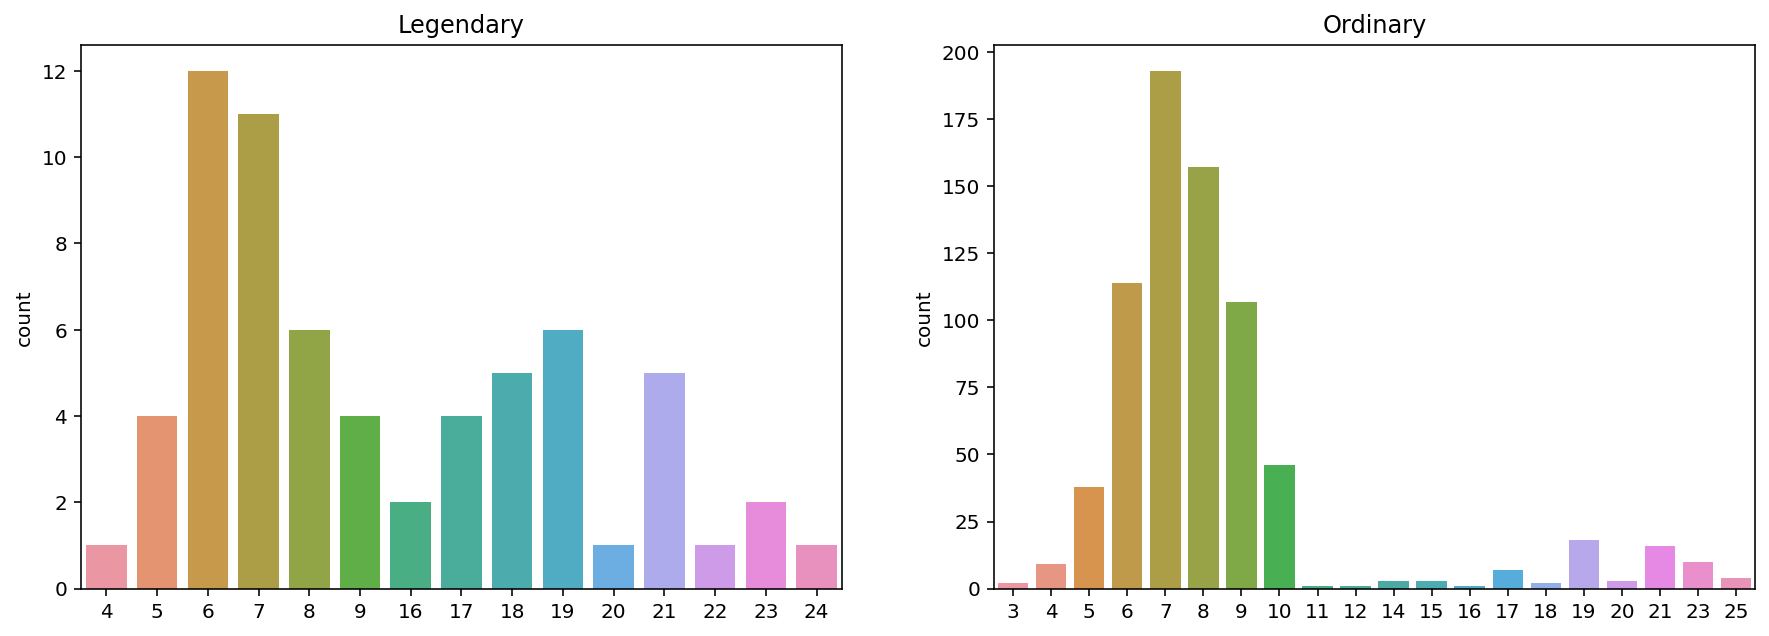

In [40]:
#name_count Ïª¨ÎüºÏùò ÌäπÏßï

plt.figure(figsize=(15, 5))   # ÌôîÎ©¥ Ìï¥ÏÉÅÎèÑÏóê Îî∞Îùº Í∑∏ÎûòÌîÑ ÌÅ¨Í∏∞Î•º Ï°∞Ï†ïÌï¥ Ï£ºÏÑ∏Ïöî.

plt.subplot(121)
sns.countplot(data=legendary, x="Name_count").set_xlabel('')
plt.title("Legendary")

plt.subplot(122)
sns.countplot(data=ordinary, x="Name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()

* Ï†ÑÏÑ§Ìè¨ÏºìÎ™¨ÏùÄ 16Ïûê Ïù¥ÏÉÅ Ïù¥Î¶Ñ Í∏∏Ïù¥ÎèÑ ÎßéÏùÄÎç∞, ÏùºÎ∞òÌè¨ÏºìÎ™¨ÏùÄ 10Ïûê Ïù¥ÏÉÅ ÎÑòÏñ¥Í∞ÄÎäî Ïï†Îì§Ïù¥ Í±∞Ïùò ÏóÜÎã§

In [41]:
#Ï†ÑÏÑ§Ìè¨ÏºìÎ™¨ Ïù¥Î¶ÑÏù¥ 10ÏûêÎ•º ÎÑòÏñ¥Í∞à ÌôïÎ•†
print(round(len(legendary[legendary['Name_count'] > 9])/ len(legendary) * 100, 2), '%')

41.54 %


In [42]:
#ÏùºÎ∞òÌè¨ÏºìÎ™¨ Ïù¥Î¶ÑÏù¥ 10ÏûêÎ•º ÎÑòÏñ¥Í∞à ÌôïÎ•†
print(round(len(ordinary[ordinary['Name_count'] > 9]) / len(ordinary) * 100, 2), '%')

15.65 %


## 4. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

- ÏßÄÍ∏àÍπåÏßÄ Ï§ëÏöîÌïú ÏßÄÌëúÎ•º Ï†ïÎ¶¨Ìï¥Î≥¥Ïûê
1. Ïù¥Î¶ÑÏùò Í∏∏Ïù¥ (10Ïûê ÎÑòÎäîÏßÄ)
2. Type
3. ÌäπÏ†ï Total stat
4. Ïù¥Î¶ÑÏóê FormeÍ∞Ä Îì§Ïñ¥Í∞ÄÎäîÏßÄ

### 1) Ïù¥Î¶ÑÏùò Í∏∏Ïù¥

In [43]:
pokemon['Name_count'] = pokemon['Name'].apply(lambda i:len(i))
pokemon.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  Name_count  
0       65       65     45           1      False           9  
1       80       80     60           1      False           7  
2      100      100     80           1      False           8  
3      122      120     80           1      False          21  
4       60       50     65           1      False          10

In [44]:
 #ÏÉàÎ°úÏö¥ Ïª¨Îüº ÏÉùÏÑ±ÌïòÍ∏∞ (Ïù¥Î¶ÑÍ∏∏Ïù¥Í∞Ä 10 Ïù¥ÏÉÅÏù¥Î©¥ True)
pokemon['Long_name'] = pokemon['Name_count'] > 9
pokemon.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  Name_count  Long_name  
0       65       65     45           1      False           9      False  
1       80       80     60           1      False           7      False  
2      100      100     80           1      False           8      False  
3      122      120     80           1      False          21       True  
4       60       50     65           1      False          10       True

### 2) Ïù¥Î¶ÑÏóê ÏûêÏ£º Ïì∞Ïù¥Îäî Îã®Ïñ¥ (ÌÜ†ÌÅ∞)

* Ïñ¥Îñ§ Î¨∏ÏûêÏó¥Ïù¥ ÏïåÌååÎ≤≥ÏúºÎ°úÎßå Ïù¥Î£®Ïñ¥Ï†∏ ÏûàÎäîÏßÄÎ•º ÌôïÏù∏ÌïòÍ≥† Ïã∂ÏùÑ ÎïåÎäî isalpha() Ìï®ÏàòÎ•º ÏÇ¨Ïö© (Ï£ºÏùòÌï† Ï†êÏùÄ Ïù¥Î¶ÑÏóê ÎùÑÏñ¥Ïì∞Í∏∞Í∞Ä ÏûàÎäî Í≤ΩÏö∞Ïóê FalseÎ°ú Ï≤òÎ¶¨ÎêúÎã§)

In [45]:
#Îî∞ÎùºÏÑú, ÎùÑÏñ¥Ïì∞Í∏∞ ÏóÜÎäî ÏπºÎüºÏùÑ Îî∞Î°ú ÎßåÎì§Ïñ¥Ï£ºÎèÑÎ°ù ÌïúÎã§
pokemon['Name_nospace'] = pokemon['Name'].apply(lambda i : i.replace(" ",""))
pokemon.head()                                                                    

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  Name_count  Long_name  \
0       65       65     45           1      False           9      False   
1       80       80     60           1      False           7      False   
2      100      100     80           1      False           8      False   
3      122      120     80           1      False          21       True   
4       60       50     65           1      False          10       True   

           Name_nospace  
0             Bulbasaur  
1               Ivysaur  
2              Venusaur  
3  VenusaurMegaVenusaur  
4            Charmander

In [46]:
#isalphaÎ°ú Ïù¥Î¶ÑÏù¥ ÏïåÌååÎ≤≥ÏúºÎ°úÎßå Ïù¥Î§ÑÏ†∏ÏûàÎäîÏßÄ ÌôïÏù∏!
pokemon['Name_isalpha'] = pokemon['Name_nospace'].apply(lambda i : i.isalpha())
pokemon.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  Name_count  Long_name  \
0       65       65     45           1      False           9      False   
1       80       80     60           1      False           7      False   
2      100      100     80           1      False           8      False   
3      122      120     80           1      False          21       True   
4       60       50     65           1      False          10       True   

           Name_nospace  Name_isalpha  
0             Bulbasaur          True  
1               Ivysaur          True  
2              Venusaur          True  
3  VenusaurMegaVenusaur          True  
4            Charmander          True

In [47]:
#Î¨∏ÏûêÍ∞Ä ÏïÑÎãå Í≤å Ìè¨Ìï®Îêú Ìï≠Î™©ÏùÑ ÌôïÏù∏Ìï¥Î≥∏Îã§
print(pokemon[pokemon['Name_isalpha'] ==False].shape)
pokemon[pokemon['Name_isalpha'] ==False]

(9, 17)


#              Name   Type 1  Type 2  Total   HP  Attack  Defense  \
34    29          Nidoran‚ôÄ   Poison     NaN    275   55      47       52   
37    32          Nidoran‚ôÇ   Poison     NaN    273   46      57       40   
90    83        Farfetch'd   Normal  Flying    352   52      65       55   
131  122          Mr. Mime  Psychic   Fairy    460   40      45       65   
252  233          Porygon2   Normal     NaN    515   85      80       90   
270  250             Ho-oh     Fire  Flying    680  106     130       90   
487  439          Mime Jr.  Psychic   Fairy    310   20      25       45   
525  474         Porygon-Z   Normal     NaN    535   85      80       70   
794  718  Zygarde50% Forme   Dragon  Ground    600  108     100      121   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  Name_count  Long_name  \
34        40       40     41           1      False           8      False   
37        40       40     50           1      False           8      False   
90        58       62     60           1      False          10       True   
131      100      120     90           1      False           8      False   
252      105       95     60           2      False           8      False   
270      110      154     90           2       True           5      False   
487       70       90     60           4      False           8      False   
525      135       75     90           4      False           9      False   
794       81       95     95           6       True          16       True   

        Name_nospace  Name_isalpha  
34          Nidoran‚ôÄ         False  
37          Nidoran‚ôÇ         False  
90        Farfetch'd         False  
131          Mr.Mime         False  
252         Porygon2         False  
270            Ho-oh         False  
487          MimeJr.         False  
525        Porygon-Z         False  
794  Zygarde50%Forme         False

### üí°ÏñòÎÑ§Îäî Ïù¥Î¶ÑÏù¥ Ï¢Ä Ïù¥ÏÉÅÌïòÍ≤å ÎèºÏûàÏúºÎãàÍπå, Î∞îÍøîÏ§ÄÎã§. 
Ïó¨Í∏∞ÏÑúÎèÑ replace Î¨∏Î≤ïÏùÑ Ï§ÑÏ§ÑÏù¥ Ïì∞ÏßÄ ÏïäÍ≥†, Ìïú Ï§ÑÎ°ú Îçî ÍπîÎÅîÌïòÍ≤å Ïì∞Î†§Í≥† ÏãúÎèÑÌñàÎã§.

In [48]:
#Ï£ºÏñ¥ÏßÑ ÏΩîÎìúÎäî Îòê... ÎÑàÎ¨¥ Í∏∏Ïñ¥ÏÑú ÌïúÏ§ÑÎ°ú Ï§ÑÏù∏Îã§. 

pokemon = pokemon.replace(["Nidoran‚ôÄ", "Nidoran‚ôÇ", "Farfetch'd", "Mr. Mime", "Porygon2", "Ho-oh", "Mime Jr.", "Porygon-Z", "Zygarde50% Forme"],
                          ["Nidoran X", "Nidoran Y", "Farfetchd", "Mr Mime", "Porygon Two", "Ho Oh", "Mime Jr", "Porygon Z", "Zygarde Forme"])

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

#           Name   Type 1  Type 2  Total   HP  Attack  Defense  \
34    29      Nidoran X   Poison     NaN    275   55      47       52   
37    32      Nidoran Y   Poison     NaN    273   46      57       40   
90    83      Farfetchd   Normal  Flying    352   52      65       55   
131  122        Mr Mime  Psychic   Fairy    460   40      45       65   
252  233    Porygon Two   Normal     NaN    515   85      80       90   
270  250          Ho Oh     Fire  Flying    680  106     130       90   
487  439        Mime Jr  Psychic   Fairy    310   20      25       45   
525  474      Porygon Z   Normal     NaN    535   85      80       70   
794  718  Zygarde Forme   Dragon  Ground    600  108     100      121   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  Name_count  Long_name  \
34        40       40     41           1      False           8      False   
37        40       40     50           1      False           8      False   
90        58       62     60           1      False          10       True   
131      100      120     90           1      False           8      False   
252      105       95     60           2      False           8      False   
270      110      154     90           2       True           5      False   
487       70       90     60           4      False           8      False   
525      135       75     90           4      False           9      False   
794       81       95     95           6       True          16       True   

        Name_nospace  Name_isalpha  
34         Nidoran X         False  
37         Nidoran Y         False  
90         Farfetchd         False  
131          Mr.Mime         False  
252      Porygon Two         False  
270            Ho Oh         False  
487          MimeJr.         False  
525        Porygon Z         False  
794  Zygarde50%Forme         False

In [49]:
pokemon['Name_nospace'] = pokemon['Name'].apply(lambda i: i.replace(" ",''))
pokemon['Name_isalpha'] = pokemon['Name_nospace'].apply(lambda i : i.isalpha())
pokemon[pokemon['Name_isalpha']==False]

Empty DataFrame
Columns: [#, Name, Type 1, Type 2, Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Generation, Legendary, Name_count, Long_name, Name_nospace, Name_isalpha]
Index: []

### ÌÜ†ÌÅ∞ÌôîÌïòÍ∏∞ (Ïù¥Î¶Ñ ÎùÑÏñ¥Ïì∞Í∏∞/ ÎåÄÎ¨∏Ïûê Í∏∞Ï§ÄÏúºÎ°ú Î∂ÑÎ¶¨ÌïòÍ∏∞)
- Ï†ïÍ∑úÌëúÌòÑÏãù(RegEx)
- Í¥ÄÎ†®Î¨∏ÏÑú (https://wikidocs.net/4308)
- Ìå®ÌÑ¥ÏùÑ Ï∞æÎäî Í≤ÉÏùÄ ÏïûÏÑú import Ìïú re Ìå®ÌÇ§ÏßÄÏùò findall ÏÇ¨Ïö©
    - ex) tokens = re.findall('[A-Z][a-z]*', temp) : ÎåÄÎ¨∏ÏûêÎ°ú ÏãúÏûëÌïòÍ≥†, ÏÜåÎ¨∏ÏûêÍ∞Ä Î∂ôÎäîÎç∞, Í∑∏ ÏÜåÎ¨∏Ïûê Í∞úÏàòÍ∞Ä 0Í∞ú Ïù¥ÏÉÅÏù∏ Ìå®ÌÑ¥
   

In [50]:
#Ï†ïÍ∑úÏãù reÌå®ÌÇ§ÏßÄ
import re

In [51]:
#ÌÄ¥Ï¶à
def tokenize(name):
    name_split = name.split(' ')
    tokens = []
    for part_name in name_split:
        a = re.findall('[A-Z][a-z]*', part_name)
        tokens.extend(a)
    return np.array(tokens)

In [52]:
#ÏòàÏãú
name = "CharizardMega Charizard X"
tokenize(name)

array(['Charizard', 'Mega', 'Charizard', 'X'], dtype='<U9')

In [53]:
all_tokens = list(legendary['Name'].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)
    
print(len(set(token_set)))
print(token_set)

65
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Therian', 'Form

* ÎßéÏù¥ ÏÇ¨Ïö©Îêú ÌÜ†ÌÅ∞ÏùÑ Ï∂îÏ∂úÌïòÎäî Î∞©Î≤ï : Counter ÏÇ¨Ïö©Î≤ï! 
* CounterÎäî Í∞Å ÏöîÏÜåÎ≥Ñ Í∞ØÏàòÎ•º Îã¥ÏùÄ ÎîïÏÖîÎÑàÎ¶¨ ÌòïÌÉúÏùò Counter Í∞ùÏ≤¥Î•º Ï∂úÎ†•ÌïúÎã§
    - Counter(list) : Î¶¨Ïä§Ìä∏ÏóêÏÑú Í∞ÅÍ∞Å ÏöîÏÜåÎ≥Ñ Îì±Ïû•ÌöüÏàòÎ•º ÏïåÎ†§Ï§å
    - Counter(list).most_common() : Í∞ÄÏû• ÎßéÏùÄ ÏöîÏÜåÏôÄ Îì±Ïû•ÌöüÏàòÎ•º Ï†ïÎ†¨

In [54]:
from collections import Counter
my_list = ['a', 'd', 'c', 'a', 'b']

In [55]:
my_counter = Counter(my_list)
my_counter

Counter({'a': 2, 'd': 1, 'c': 1, 'b': 1})

In [56]:
#most_commonÏùÄ ÏïΩÍ∞Ñ... headÎûë ÎπÑÏä∑Ìïú Í∞úÎÖêÍ∞ôÏùÄÍ±∞Îã§. 
from collections import Counter
most_common = Counter(token_set).most_common(10)
most_common

[('Forme', 15),
 ('Mega', 6),
 ('Mewtwo', 5),
 ('Kyurem', 5),
 ('Deoxys', 4),
 ('Hoopa', 4),
 ('Latias', 3),
 ('Latios', 3),
 ('Kyogre', 3),
 ('Groudon', 3)]

### ÌÜ†ÌÅ∞ÏùÑ Í∞ÄÏßÄÍ≥†, Ï†ÑÏÑ§Ïùò Ìè¨ÏºìÎ™¨ Ïù¥Î¶ÑÏóê Îì±Ïû•ÌïòÎäî ÌÜ†ÌÅ∞Ïù¥ Ìè¨ÏºìÎ™¨Ïùò Ïù¥Î¶ÑÏóê ÏûàÎäîÏßÄÏùò Ïó¨Î∂ÄÎ•º ÎÇòÌÉÄÎÇ¥Îäî Ïª¨ÎüºÎßåÎì§Í∏∞

In [57]:
#most_commomÏùò Í∞Å ÏöîÏÜåÍ∞Ä ÌäúÌîåÎ°ú ÎêòÏñ¥ÏûàÏúºÎãàÍπå token, _ ÏúºÎ°ú Ìò∏Ï∂úÌïúÎã§. tokenÎßå Ìò∏Ï∂úÌï¥ÏÑú Ïì∞Í≥† Ïã∂ÏúºÎãàÍπå Í∑∏ÎÉ• Î™ÖÎ™©ÏÉÅÏúºÎ°ú _Î•º Ïç®Ï§ÄÎã§
#_ ÏûêÎ¶¨Ïóê countÏ≤òÎüº Îã§Î•∏ Í±∏ Ïç®Ï§òÎèÑ ÎêúÎã§
#f"{token}"ÏùÄ Î¨∏ÏûêÏó¥ Î≥¥Í∞Ñ(interpolation)Ïùò Î¨∏Î≤ïÏù¥Îã§. Í∑∏ ÏïàÏóê Î¨∏ÏûêÏó¥Ïù¥ Îì§Ïñ¥Í∞ÄÍ≤å ÎêúÎã§.

for token, _ in most_common:
    pokemon[f"{token}"] = pokemon['Name'].str.contains(token)

pokemon.head(10)

#                       Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1                  Bulbasaur  Grass  Poison    318  45      49       49   
1  2                    Ivysaur  Grass  Poison    405  60      62       63   
2  3                   Venusaur  Grass  Poison    525  80      82       83   
3  3      VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4                 Charmander   Fire     NaN    309  39      52       43   
5  5                 Charmeleon   Fire     NaN    405  58      64       58   
6  6                  Charizard   Fire  Flying    534  78      84       78   
7  6  CharizardMega Charizard X   Fire  Dragon    634  78     130      111   
8  6  CharizardMega Charizard Y   Fire  Flying    634  78     104       78   
9  7                   Squirtle  Water     NaN    314  44      48       65   

   Sp. Atk  Sp. Def  ...  Forme   Mega  Mewtwo  Kyurem  Deoxys  Hoopa  Latias  \
0       65       65  ...  False  False   False   False   False  False   False   
1       80       80  ...  False  False   False   False   False  False   False   
2      100      100  ...  False  False   False   False   False  False   False   
3      122      120  ...  False   True   False   False   False  False   False   
4       60       50  ...  False  False   False   False   False  False   False   
5       80       65  ...  False  False   False   False   False  False   False   
6      109       85  ...  False  False   False   False   False  False   False   
7      130       85  ...  False   True   False   False   False  False   False   
8      159      115  ...  False   True   False   False   False  False   False   
9       50       64  ...  False  False   False   False   False  False   False   

   Latios  Kyogre  Groudon  
0   False   False    False  
1   False   False    False  
2   False   False    False  
3   False   False    False  
4   False   False    False  
5   False   False    False  
6   False   False    False  
7   False   False    False  
8   False   False    False  
9   False   False    False  

[10 rows x 27 columns]

### 3) Type1, 2 Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
- Î™®Îì† ÌÉÄÏûÖÏùÑ One Hot encoding Ìï¥Ï§ÄÎã§

In [58]:
#ÏúÑÏóêÏÑú ÎßåÎì§ÏóàÎçò Type Ï¢ÖÎ•òÎ•º Í∞ÄÏ†∏Ïò®Îã§.
print(types)

['Fire', 'Water', 'Ground', 'Ghost', 'Psychic', 'Poison', 'Dragon', 'Ice', 'Flying', 'Fairy', 'Fighting', 'Normal', 'Rock', 'Electric', 'Dark', 'Steel', 'Bug', 'Grass']


In [59]:
#ÏïÑ Ïù¥Î†áÍ≤å Ìï† ÏàòÎèÑ ÏûàÍµ¨Îßà
for t in types:
    pokemon[t] = (pokemon['Type 1'] ==t) | (pokemon['Type 2'] == t)

#Í≤∞Í≥ºÎ•º Ìïú Î≤à ÌôïÏù∏Ìï¥Î≥∏Îã§   
pokemon[[['Type 1', 'Type 2'] + types][0]].head()

Type 1  Type 2   Fire  Water  Ground  Ghost  Psychic  Poison  Dragon    Ice  \
0  Grass  Poison  False  False   False  False    False    True   False  False   
1  Grass  Poison  False  False   False  False    False    True   False  False   
2  Grass  Poison  False  False   False  False    False    True   False  False   
3  Grass  Poison  False  False   False  False    False    True   False  False   
4   Fire     NaN   True  False   False  False    False   False   False  False   

   Flying  Fairy  Fighting  Normal   Rock  Electric   Dark  Steel    Bug  \
0   False  False     False   False  False     False  False  False  False   
1   False  False     False   False  False     False  False  False  False   
2   False  False     False   False  False     False  False  False  False   
3   False  False     False   False  False     False  False  False  False   
4   False  False     False   False  False     False  False  False  False   

   Grass  
0   True  
1   True  
2   True  
3   True  
4  False

### üí° Î≥ÄÏàòÍ∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥º Ïàò ÏûàÎÇò ÌôïÏù∏Ìï¥Î≥¥Í∏∞ ÏúÑÌï¥ HeatmapÏùÑ Í∑∏Î†§Î≥¥ÏïòÎã§.

<AxesSubplot:>

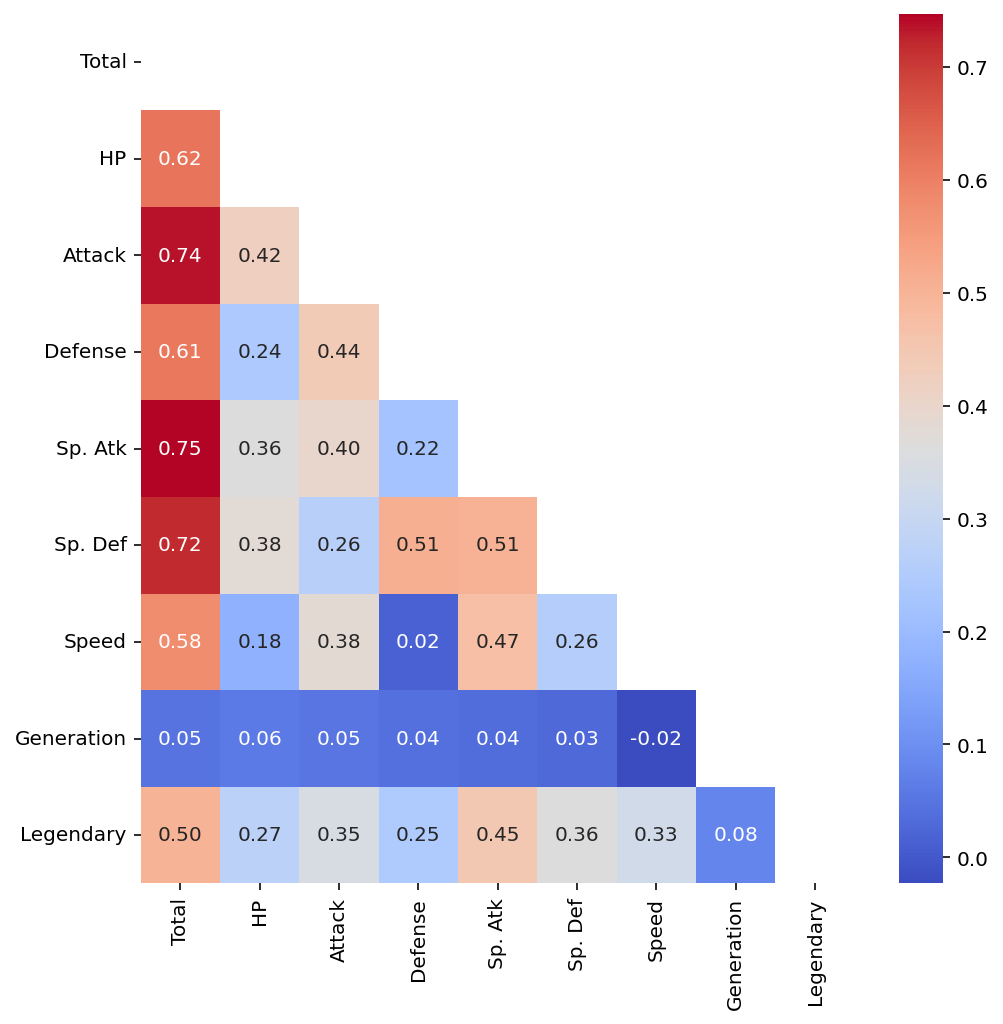

In [60]:
#ÌïúÎ≤à ÌûàÌä∏ÎßµÏùÑ Í∑∏Î†§Î≥∏Îã§.

plt.figure(figsize=(8,8))
corr_df = pokemon[['Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']].corr()

mask = np.triu(np.ones_like(corr_df))

sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', mask=mask)

---
### Ïó¨Í∏∞ÏÑúÎ∂ÄÌÑ∞ Î®∏Ïã†Îü¨Îãù !

## 5. Baseline Î™®Îç∏ ÎßåÎì§Í∏∞

In [61]:
#Ï†ÑÏ≤òÎ¶¨Ìïú Îç∞Ïù¥ÌÑ∞ ÎßêÍ≥† ÏôÑÏ†Ñ Í∏∞Î≥∏ Îç∞Ïù¥ÌÑ∞Î°ú Ìïú Î≤à ÎßåÎì§Ïñ¥Î≥¥Ïûê
print(original_data.shape)
original_data.head()

(800, 13)


#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

### 1) ÏÇ¨Ïö©Ìï† featureÎì§ ÏÑ†ÌÉù

In [62]:
#Î¨∏ÏûêÏó¥ Îç∞Ïù¥ÌÑ∞Î•º Í∑∏ÎÉ• Ï†úÏô∏Ìï¥Ï£ºÏûê
original_data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [63]:
#ÏÑ†ÌÉùÌï† Ïª¨ÎüºÎì§Îßå Îî∞Î°ú Î∫ÄÎã§
features = ['Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']
target = 'Legendary'

### 2) ÎèÖÎ¶ΩÎ≥ÄÏàò, Ï¢ÖÏÜçÎ≥ÄÏàò X, yÎ•º ÎÇòÎà†Ï§ÄÎã§

In [64]:
# Q. 'original_data'ÏóêÏÑú 'features' Ïª¨ÎüºÏóê Ìï¥ÎãπÌïòÎäî Îç∞Ïù¥ÌÑ∞Î•º Î≥ÄÏàò 'X'Ïóê Ï†ÄÏû•Ìï©ÎãàÎã§.
X = original_data[features]
print(X.shape)
X.head()

(800, 8)


Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation
0    318  45      49       49       65       65     45           1
1    405  60      62       63       80       80     60           1
2    525  80      82       83      100      100     80           1
3    625  80     100      123      122      120     80           1
4    309  39      52       43       60       50     65           1

In [65]:
# Q. 'target' Ïª¨ÎüºÏùò Îç∞Ïù¥ÌÑ∞Î•º Î≥ÄÏàò 'y'Ïóê Ï†ÄÏû•Ìï©ÎãàÎã§.
y = original_data[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

### 3) train, validationÏùÑ ÎÇòÎà†Ï§ÄÎã§ (Î™®Îç∏ ÌïôÏäµ & ÌèâÍ∞Ä)

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=15)

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((640, 8), (640,), (160, 8), (160,))

### 4) Î∂ÑÎ•òÎ™®Îç∏ (Classification) Î∂àÎü¨Ïò§Í∏∞ (Ïó¨Í∏∞ÏÑúÎäî Decision Tree ÏÇ¨Ïö©)

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
#random_stateÎäî Î™®Îç∏Ïùò ÎûúÎç§ÏÑ±ÏùÑ Ï†úÏñ¥Ìï©ÎãàÎã§. 
#Ïñ¥Îñ§ Í∞íÏùÑ ÎÑ£Ïñ¥ÎèÑ ÏÉÅÍ¥ÄÏóÜÏßÄÎßå, Ïã§Ìóò Îã®Í≥ÑÏóêÏÑúÎäî ÎûúÎç§ÏÑ±Ïóê ÏùòÌï¥ ÌïôÏäµ Í≤∞Í≥ºÍ∞Ä Ï∞®Ïù¥ ÎÇòÎäî Í≤ÉÏùÑ Î∞©ÏßÄÌïòÍ∏∞ ÏúÑÌï¥ ÌïòÎÇòÏùò Í∞íÏúºÎ°ú Í≥†Ï†ïÌï¥ÏÑú Ïã§ÌóòÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏäµÎãàÎã§.
model = DecisionTreeClassifier(random_state=25)

In [69]:
model.fit(X_train, y_train)
pred = model.predict(X_val)

### 5) Î™®Îç∏Ïù¥ X_testÎ•º ÏûÖÎ†•Î∞õÍ≥† ÏòàÏ∏°Ìïú pred Í∞í & Ïã§Ï†ú Ï†ïÎãµ y_val Í≥º ÎπÑÏä∑ÌïúÏßÄ Ï±ÑÏ†ê

In [70]:
#(Ïã§Ï†úÍ∞í, ÏòàÏ∏°Í∞í)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, pred)

array([[144,   3],
       [  5,   8]])

* [TN, FP  
   FN, TP]
* positive : Ï†ÑÏÑ§Ïùò Ìè¨ÏºìÎ™¨, negative : ÏùºÎ∞òÌè¨ÏºìÎ™¨ÏùÑ ÎÇòÌÉÄÎÇ∏Îã§
    - TN (True Negative) : Ïò≥Í≤å ÌåêÎã®Ìïú Negative, Ï¶â ÏùºÎ∞ò Ìè¨ÏºìÎ™¨ÏùÑ ÏùºÎ∞ò Ìè¨ÏºìÎ™¨Ïù¥ÎùºÍ≥† ÏïåÎßûÍ≤å ÌåêÎã®Ìïú Í≤ΩÏö∞ÏûÖÎãàÎã§.
    - FP (False Positive) : ÌãÄÎ¶¨Í≤å ÌåêÎã®Ìïú Positive, Ï¶â ÏùºÎ∞ò Ìè¨ÏºìÎ™¨ÏùÑ Ï†ÑÏÑ§Ïùò Ìè¨ÏºìÎ™¨Ïù¥ÎùºÍ≥† ÏûòÎ™ª ÌåêÎã®Ìïú Í≤ΩÏö∞ÏûÖÎãàÎã§.
    - FN (False Negative) : ÌãÄÎ¶¨Í≤å ÌåêÎã®Ìïú Negative, Ï¶â Ï†ÑÏÑ§Ïùò Ìè¨ÏºìÎ™¨ÏùÑ ÏùºÎ∞ò Ìè¨ÏºìÎ™¨Ïù¥ÎùºÍ≥† ÏûòÎ™ª ÌåêÎã®Ìïú Í≤ΩÏö∞ÏûÖÎãàÎã§.
    - TP (True Positive) : Ïò≥Í≤å ÌåêÎã®Ìïú Positive, Ï¶â Ï†ÑÏÑ§Ïùò Ìè¨ÏºìÎ™¨ÏùÑ Ï†ÑÏÑ§Ïùò Ìè¨ÏºìÎ™¨Ïù¥ÎùºÍ≥† ÏïåÎßûÍ≤å ÌåêÎã®Ìïú Í≤ΩÏö∞ÏûÖÎãàÎã§.

* Ï†ÑÏ≤¥ 160 ÌïôÏäµÎç∞Ïù¥ÌÑ∞ Ï§ëÏóêÏÑú FP, FNÏù¥ 8Í∞úÎøêÏù¥Îãà ÎÇòÏÅòÏßÄ ÏïäÎã§

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



* recall = TP / (FN + TP)
* recall Ïù¥ ÎÇÆÎã§Îäî Í±¥, FN (Í∞ÄÏßúÏùºÎ∞ò : Ï†ÑÏÑ§Ïùò Ìè¨ÏºìÎ™¨Ïù∏Îç∞ ÏùºÎ∞òÌè¨ÏºìÎ™¨Ïù¥ÎùºÍ≥† ÌåêÎã®ÌïòÎäî Í≤ΩÏö∞)Í∞Ä ÎßéÏùÄ Í≤ÉÏûÑ

## 6. Feature Engineering Îç∞Ïù¥ÌÑ∞Î°ú Îã§Ïãú Î™®Îç∏ÎßÅÌïòÍ∏∞

### 1) ÏÇ¨Ïö©Ìï† featureÎì§ ÏÑ†ÌÉù

In [72]:
print(len(pokemon.columns))
print(pokemon.columns)

45
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'Name_count',
       'Long_name', 'Name_nospace', 'Name_isalpha', 'Forme', 'Mega', 'Mewtwo',
       'Kyurem', 'Deoxys', 'Hoopa', 'Latias', 'Latios', 'Kyogre', 'Groudon',
       'Fire', 'Water', 'Ground', 'Ghost', 'Psychic', 'Poison', 'Dragon',
       'Ice', 'Flying', 'Fairy', 'Fighting', 'Normal', 'Rock', 'Electric',
       'Dark', 'Steel', 'Bug', 'Grass'],
      dtype='object')


* Ïö∞Î¶¨Í∞Ä ÏïûÏóêÏÑú Ï†ÑÏ≤òÎ¶¨Î•º Ïûò Ìï¥Ï§òÏÑú, Ïª¨ÎüºÏù¥ Í∏∞Ï°¥ 13Í∞úÏóêÏÑú 45Í∞úÎ°ú ÎäòÏñ¥ÎÇ¨Îã§. ÌïÑÏöîÏóÜÎäî Ïó¥ÏùÄ Ï†úÍ±∞Ìï¥Ï§ÄÎã§

### üí° Ïó¨Í∏∞ÏÑúÎèÑ, Î™®Îì† ÌîºÏ≤òÎ•º Ïª¨ÎüºÏúºÎ°ú ÏùºÏùºÏù¥ Ïì∞ÏßÄ ÏïäÍ≥†, ÌïÑÏöîÏóÜÎäî Í≤ÉÎßå dropÌïòÍ≥† ÎÇòÎ®∏ÏßÄ Ïª¨ÎüºÎßå ÏßÄÏ†ïÌï¥Ï£ºÎäî Î∞©ÏãùÏùÑ ÏãúÎèÑÌñàÎã§

In [78]:
#ÎèÖÎ¶ΩÎ≥ÄÏàò(X)Î°ú ÎÑ£ÏùÑ Ïª¨ÎüºÎì§Îßå Ï∂îÎ¶∞Îã§.
features = pokemon.drop(columns=['#', 'Name', 'Type 1', 'Type 2', 'Name_nospace', 'Name_isalpha', 'Legendary']).columns
len(features)

#ÎÖ∏ÎìúÏóêÏÑú Ï£ºÏñ¥ÏßÑ ÏΩîÎìúÎäî ÏïÑÎûòÏôÄ Í∞ôÏùÄÎç∞, Íµ≥Ïù¥ Îã§ ÏßöÏñ¥Ï£ºÏßÄ ÏïäÏïÑÎèÑ ÎêòÏßÄ ÏïäÏùÑÍπåÎÇò
# features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 
#             'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
#             'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
#             'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

# len(features)

38

In [79]:
target = 'Legendary'

### 2) ÎèÖÎ¶ΩÎ≥ÄÏàò, Ï¢ÖÏÜçÎ≥ÄÏàò X, yÎ•º ÎÇòÎà†Ï§ÄÎã§

In [80]:
#ÌïúÎ≤àÏóê ÌëúÌòÑÌïòÍ∏∞

X = pokemon[features]
y = pokemon[target]

print(X.shape, y.shape)
display(X.head())
display(y.head())

(800, 38) (800,)


Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  \
0    318  45      49       49       65       65     45           1   
1    405  60      62       63       80       80     60           1   
2    525  80      82       83      100      100     80           1   
3    625  80     100      123      122      120     80           1   
4    309  39      52       43       60       50     65           1   

   Name_count  Long_name  ...  Flying  Fairy  Fighting  Normal   Rock  \
0           9      False  ...   False  False     False   False  False   
1           7      False  ...   False  False     False   False  False   
2           8      False  ...   False  False     False   False  False   
3          21       True  ...   False  False     False   False  False   
4          10       True  ...   False  False     False   False  False   

   Electric   Dark  Steel    Bug  Grass  
0     False  False  False  False   True  
1     False  False  False  False   True  
2     False  False  False  False   True  
3     False  False  False  False   True  
4     False  False  False  False  False  

[5 rows x 38 columns]

0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

### 3) train, validationÏùÑ ÎÇòÎà†Ï§ÄÎã§ (Î™®Îç∏ ÌïôÏäµ & ÌèâÍ∞Ä)

In [82]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=15)

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((640, 38), (640,), (160, 38), (160,))

### 4) Î∂ÑÎ•òÎ™®Îç∏ (Classification) Î∂àÎü¨Ïò§Í∏∞ (Ïó¨Í∏∞ÏÑúÎäî Decision Tree ÏÇ¨Ïö©)

In [83]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [84]:
model.fit(X_train, y_train)
pred = model.predict(X_val)

### 5) Î™®Îç∏Ïù¥ X_testÎ•º ÏûÖÎ†•Î∞õÍ≥† ÏòàÏ∏°Ìïú pred Í∞í & Ïã§Ï†ú Ï†ïÎãµ y_val Í≥º ÎπÑÏä∑ÌïúÏßÄ Ï±ÑÏ†ê¬∂

In [85]:
confusion_matrix(y_val, pred)

array([[141,   6],
       [  1,  12]])

In [88]:
# accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_val, pred))

# precision
from sklearn.metrics import precision_score
print(precision_score(y_val, pred))

# recall
from sklearn.metrics import recall_score
print(recall_score(y_val, pred))

# f1 score
from sklearn.metrics import f1_score
print(f1_score(y_val, pred))

0.95625
0.6666666666666666
0.9230769230769231
0.7741935483870968


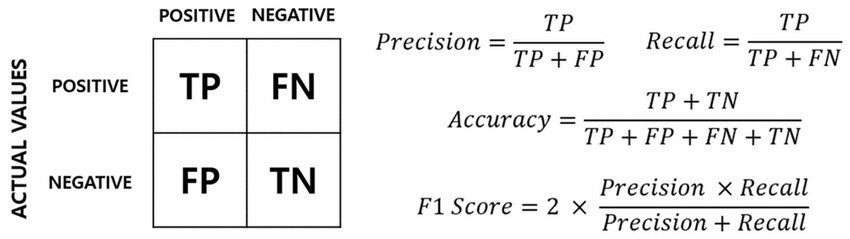  


- Accuracy : Î™®Îç∏Ïù¥ Ï†ïÌôïÌïòÍ≤å ÏòàÏ∏°Ìïú ÎπÑÏú® 
    - Accuracy = (TP + TN) / (TP+TN+FP+FN) 
    
- Precision(Ï†ïÎ∞ÄÎèÑ) : Î™®Îç∏Ïù¥ ÏñëÏÑ±ÏúºÎ°ú ÏòàÏ∏°Ìïú Í∞í Ï§ë, Ïã§Ï†ú ÏñëÏÑ±Ïù∏ ÎπÑÏú® (precision, recallÏùÄ Ïó≠Ïùò Í¥ÄÍ≥Ñ) 
    - Precision= TP / (TP+FP)  
    
- Recall(Ïû¨ÌòÑÏú®) : Ïã§Ï†ú ÏñëÏÑ± Í∞í Ï§ë, Î™®Îç∏Ïù¥ ÏñëÏÑ±ÏúºÎ°ú Ïò¨Î∞îÎ•¥Í≤å ÏòàÏ∏°Ìïú ÎπÑÏú®
    - Recall = TP / (TP+FN)  
    
- F1 Score
    - F1-score=  2 √ó (Precision √ó Recall) / (Precision + Recall) 
  

In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160



---
# üí° Project : Îã§Î•∏ Î®∏Ïã†Îü¨Îãù Î™®Îç∏Î°ú ÏÑ±Îä• ÎÜíÏù¥Í∏∞
- classification Î¨∏Ï†úÏóê Ïì∏ Ïàò ÏûàÎäî Î®∏Ïã†Îü¨Îãù Î™®Îç∏ÏóêÎäî Îã§ÏùåÏù¥ ÏûàÎã§
    - DecisionTree
    - RandomForest : Ïó¨Îü¨Í∞úÏùò ÏùòÏÇ¨Í≤∞Ï†ï Ìä∏Î¶¨Î•º ÏïôÏÉÅÎ∏î (Í≤∞Í≥ºÎ•º Í≤∞Ìï©Ìï¥ ÏÑ±Îä•Ìñ•ÏÉÅ/ Í≥†Ï∞®Ïõê & ÎåÄÏö©Îüâ Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÌï©)
    - Gradient Boosting : ÏïΩÌïú ÏòàÏ∏°Î™®Îç∏(ÏùòÏÇ¨Í≤∞Ï†ïÌä∏Î¶¨)ÏùÑ Ïó∞ÏÜç ÌïôÏäµÌïòÎ©¥ÏÑú Ïò§Ï∞® Î≥¥Í∞ïÌï¥ Í∞ïÌïú Î™®Îç∏ÏùÑ ÎßåÎì¶ (ÌïôÏäµÏãúÍ∞ÑÏù¥ Í∏∏Îã§)
    - SVM (Support Vector Machine) : Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¥ÎûòÏä§Î•º Î∂ÑÎ¶¨ÌïòÎäî Ï¥àÌèâÎ©¥ÏùÑ Ï∞æÎäîÎã§
    - Logistic Regression : Í≤ΩÏÇ¨ÌïòÍ∞ïÎ≤ï Îì± ÏµúÏ†ÅÌôî ÏïåÍ≥†Î¶¨Ï¶òÏùÑ ÏÇ¨Ïö©Ìï¥ Î™®Îç∏ ÌïôÏäµ
    - K-Nearest Neighbors (KNN) : Ï£ºÏñ¥ÏßÑ Îç∞Ïù¥ÌÑ∞Ìè¨Ïù∏Ìä∏ÏôÄ Í∞ÄÏû• Í∞ÄÍπåÏö¥ Ïù¥ÏõÉÎç∞Ïù¥ÌÑ∞ ÌÅ¥ÎûòÏä§ Í∏∞Ï§ÄÏúºÎ°ú Î∂ÑÎ•ò (Í∞ÑÎã®, Ïú†Ïó∞)
    - Naive Bayes : ÏûÖÎ†•ÌäπÏÑ±Îì§ ÏÇ¨Ïù¥ ÎèÖÎ¶Ω Í∞ÄÏ†ïÏùÑ ÏÇ¨Ïö©Ìï¥ ÌÅ¥ÎûòÏä§Î•º ÏòàÏ∏° (ÌÖçÏä§Ìä∏ Îì± ÌäπÏÑ±Ïù¥ Ìù¨ÏÜåÌïú Í≥†Ï∞®ÏõêÎç∞Ïù¥ÌÑ∞Ïóê Ìö®Í≥ºÏ†Å)
    - Neural Networks : ÏûÖÎ†•Ï∏µ,ÏùÄÎãâÏ∏µ,Ï∂úÎ†•Ï∏µÏúºÎ°ú Íµ¨ÏÑ±ÎêòÎ©∞, Îã§Ï§ë ÌçºÏÖâÌä∏Î°†(MLP)ÏùÄ Î∂ÑÎ•òÎ¨∏Ï†úÏóê ÏÇ¨Ïö©, Î≥µÏû°Ìïú Ìå®ÌÑ¥ ÌïôÏäµ Í∞ÄÎä•

   
     
* ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ÍπåÏßÄ Ï†ÅÏö©Ìï¥Ï§òÏÑú Î™®Îç∏Î≥Ñ ÏÑ±Îä•ÏùÑ ÎπÑÍµêÌï¥Î≥¥ÎèÑÎ°ù ÌïúÎã§

In [104]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def print_evaluate(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    f1 = f1_score(true, predicted)  # f1_score Ìï®Ïàò Ìò∏Ï∂ú ÌõÑ Î∞òÌôòÍ∞íÏùÑ Î≥ÄÏàòÏóê Ìï†Îãπ
    print('accuracy: ', accuracy)
    print('precision: ', precision)
    print('recall: ', recall)
    print('f1-score: ', f1)  # Î≥ÄÏàòÎ•º Ï∂úÎ†•
    
def evaluate(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    f1 = f1_score(true, predicted)  # Î≥ÄÏàò Ïù¥Î¶Ñ Î≥ÄÍ≤Ω
    return accuracy, precision, recall, f1

## 1) Decision Tree

In [125]:
#ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï†ÅÏö© Ï†Ñ

model = DecisionTreeClassifier(random_state=25)
model.fit(X_train, y_train)
pred = model.predict(X_val)

print_evaluate(y_val, pred)
result_df = pd.DataFrame(data=[["Decision Tree(Base)",*evaluate(y_val, pred)]],
                          columns=['Model','accuracy','precision','recall','f1-score'])
result_df

accuracy:  0.95625
precision:  0.6666666666666666
recall:  0.9230769230769231
f1-score:  0.7741935483870968


Model  accuracy  precision    recall  f1-score
0  Decision Tree(Base)   0.95625   0.666667  0.923077  0.774194

In [126]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(
    criterion='entropy', 
    max_depth=4, 
    min_samples_split=5,
    min_samples_leaf=2, 
    random_state=25)
 
model.fit(X_train, y_train)
pred = model.predict(X_val)
print_evaluate(y_val, pred)


result_df2 = pd.DataFrame(data=[["Decision Tree(Advanced)",*evaluate(y_val, pred)]],
                          columns=['Model','accuracy','precision','recall','f1-score'])

result_df = pd.concat([result_df, result_df2], ignore_index=True)
result_df

accuracy:  0.95625
precision:  0.65
recall:  1.0
f1-score:  0.787878787878788


Model  accuracy  precision    recall  f1-score
0      Decision Tree(Base)   0.95625   0.666667  0.923077  0.774194
1  Decision Tree(Advanced)   0.95625   0.650000  1.000000  0.787879

## 2) Random Forest

In [127]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=25)

model.fit(X_train, y_train)
pred = model.predict(X_val)
print_evaluate(y_val, pred)


result_df2 = pd.DataFrame(data=[["Random Forest",*evaluate(y_val, pred)]],
                          columns=['Model','accuracy','precision','recall','f1-score'])

result_df = pd.concat([result_df, result_df2], ignore_index=True)
result_df

accuracy:  0.9625
precision:  0.7692307692307693
recall:  0.7692307692307693
f1-score:  0.7692307692307693


Model  accuracy  precision    recall  f1-score
0      Decision Tree(Base)   0.95625   0.666667  0.923077  0.774194
1  Decision Tree(Advanced)   0.95625   0.650000  1.000000  0.787879
2            Random Forest   0.96250   0.769231  0.769231  0.769231

## 3) XGBoost

In [129]:
from xgboost import XGBClassifier
model = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
pred = model.predict(X_val)

print_evaluate(y_val, pred)


result_df2 = pd.DataFrame(data=[["XGBoost",*evaluate(y_val, pred)]],
                          columns=['Model','accuracy','precision','recall','f1-score'])

result_df = pd.concat([result_df, result_df2], ignore_index=True)
result_df

accuracy:  0.98125
precision:  0.8125
recall:  1.0
f1-score:  0.896551724137931


Model  accuracy  precision    recall  f1-score
0      Decision Tree(Base)   0.95625   0.666667  0.923077  0.774194
1  Decision Tree(Advanced)   0.95625   0.650000  1.000000  0.787879
2            Random Forest   0.96250   0.769231  0.769231  0.769231
3                  XGBoost   0.98125   0.812500  1.000000  0.896552

# üí° ÎπÑÍµê

In [134]:
result_df.columns

Index(['accuracy', 'precision', 'recall', 'f1-score'], dtype='object')

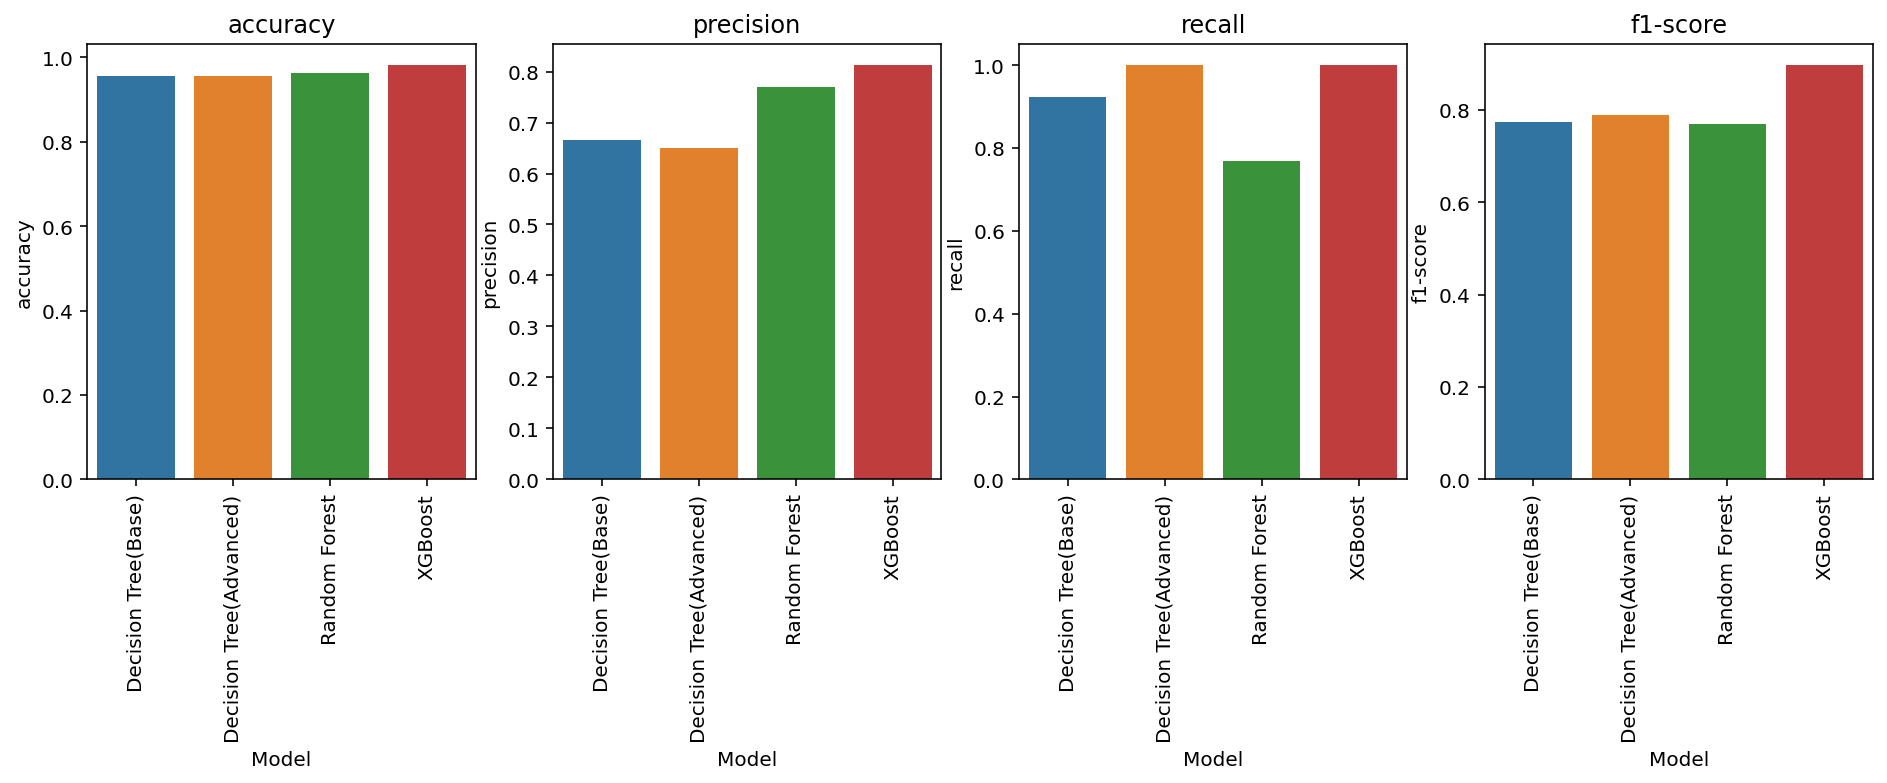

In [148]:
#forÎ¨∏ÏùÑ ÌÜµÌï¥ Í∞Å Î™®Îç∏Î≥Ñ metricsÎ•º ÎπÑÍµêÌï† Ïàò ÏûàÎäî Í∑∏ÎûòÌîÑÎ•º ÏãúÍ∞ÅÌôîÌï¥Î≥∏Îã§

fcolumns = {'accuracy':0, 'precision':1, 'recall':2, 'f1-score':3}

#4Í∞úÏùò Í∑∏ÎûòÌîÑÎ•º ÎßåÎì§Ïñ¥Ï§ÄÎã§
fig, axes = plt.subplots(1,4,figsize=(16,4))

for metric,i in columns.items():
    sns.barplot(x=result_df.index, y=metric, data=result_df, ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    axes[i].set_title(metric)
plt.show()

# üôÇ ÌöåÍ≥†
- ÏûòÌïú Ï†ê : ÎÖ∏ÎìúÏóê ÎÇòÏôÄÏûàÎäî ÏΩîÎìúÎ•º Ïä§Ïä§Î°ú Ïù¥Ìï¥ÌïòÍ∏∞ ÏâΩÍ≥† Í∞ÑÍ≤∞ÌïòÍ≥† Î≥ÄÌòïÏùÑ Ìï¥ÏÑú ÏßÑÌñâÌñàÍ≥†, ÎÇ¥Í∞Ä Í∏∞Ï°¥Ïóê Ìó∑Í∞àÎ†∏Îçò Î®∏Ïã†Îü¨Îãù ÌîÑÎ°úÏÑ∏Ïä§Î•º Ìïú Îã®Í≥ÑÏî© Î∞üÏïÑÎÇòÍ∞ÄÎ©¥ÏÑú Ï†àÏ∞®Î•º ÌôïÏã§Ìûà ÏùµÌòîÎã§. forÎ¨∏ÏùÑ Ï†ÅÍ∑π ÌôúÏö©ÌïòÏòÄÏúºÎ©∞, corr, barplotÎì± ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌï¥ Î∂ÑÏÑù Í≤∞Í≥ºÎ•º Î≥¥Í∏∞ ÏâΩÍ≤å Ï∂úÎ†•ÌïòÏòÄÎã§. ÌäπÏ†ï Îã®Ïñ¥Í∞Ä Îì§Ïñ¥Í∞ÄÏûàÎäî Ïù¥Î¶ÑÏùÑ Î∂ÑÏÑùÌï† Îïå, ÏúÑÏóêÏÑú ÌôïÏù∏ÌñàÎçò '#'Í∞íÏùÑ ÌôúÏö©ÌïòÏó¨ Ï¢Ä Îçî Ï∞ΩÏùòÏ†ÅÏúºÎ°ú Î¨∏Ï†úÎ•º Ìï¥Í≤∞ÌïòÎ†§Í≥† ÏãúÎèÑÌñàÎã§. Í∑∏Î¶¨Í≥† Ïã§Ï†úÎ°ú ÎÖ∏Í∞ÄÎã§Î°ú Ïó¥ÏùÑ ÏßÄÏ†ïÌñàÎçò ÎÖ∏ÎìúÏùò ÏΩîÎìúÏóê ÎπÑÌï¥ Îçî Ï†ïÌôïÌïú Í∞íÏùÑ Ï∂úÎ†•Ìï¥ÎÉàÎã§!! 


- Î∂ÄÏ°±Ìïú Ï†ê : ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ÏôÄ ÍµêÏ∞®Í≤ÄÏ¶ùÏóê ÎåÄÌïú Í∞úÎÖêÏùÑ Ï¢Ä Îçî ÏùµÌòÄÏïºÍ≤†Îã§. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Îäî best_paramsÎ•º ÌÜµÌï¥ ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞ Ï∞æÎäî Î≤ïÏùÑ Ïó∞ÏäµÌï¥ÏïºÌï† Í±∞ Í∞ôÍ≥†, ÍµêÏ∞®Í≤ÄÏ¶ùÏùÄ train_test_splitÏúºÎ°ú validationÏùÑ ÌÜµÌï¥ Î™®Îç∏ÏùÑ Í≤ÄÏ¶ùÌïòÎäî Í±∞ Ïô∏ÏóêÎèÑ Ìïú Î≤à Îçî KfoldÎ°ú ÎÇòÎà†ÏÑú Îã§Ïãú ÏßÑÌñâÏùÑ ÌïòÎäîÍ±¥ÏßÄ Ï°∞Í∏à Ìó∑Í∞àÎ¶∞Îã§.
    
    
- Ï†úÎåÄÎ°ú ÏïåÍ≤åÎêú Ï†ê : Regression(ÌöåÍ∑Ä), Classification(Î∂ÑÎ•ò) Î™®Îç∏ÏùÄ Í∞ÅÍ∞Å Îã§Î•∏ ÌèâÍ∞ÄÏßÄÌëúÎ•º ÏÇ¨Ïö©ÌïúÎã§. Ïó¨Í∏∞ÏÑú ÌôïÏã§Ìûà ÏßöÍ≥† ÎÑòÏñ¥Í∞ÄÏûê. ÌöåÍ∑ÄÎ¨∏Ï†úÏóêÏÑúÎäî Ïó∞ÏÜçÌòï target Î≥ÄÏàòÏùò Í∞íÏùÑ ÏòàÏ∏°ÌïòÎØÄÎ°ú, Ïò§Ï∞®Ïùò ÌÅ¨Í∏∞Î•º Ï∏°Ï†ïÌïòÎäî ÏßÄÌëúÍ∞Ä Ï§ëÏöîÌïòÎã§. ÌïòÏßÄÎßå, Î∂ÑÎ•òÎ¨∏Ï†úÏóêÏÑúÎäî Class LabelÏùÑ ÏòàÏ∏°ÌïòÎØÄÎ°ú, Î∂ÑÎ•òÏùò Ï†ïÌôïÏÑ±Í≥º Í¥ÄÎ†®Îêú ÏßÄÌëúÍ∞Ä Ï§ëÏöîÌïòÎã§Îäî Ï†ê!   


    - Regression (ÌöåÍ∑Ä)
        - MAE, MSE, RMSE, RMSLE, R2
    - Classification (Î∂ÑÎ•ò)
        - Accuracy, Precision, Recall, F1, ROC-AUC

- ÎäêÎÇÄ Ï†ê : Ï∫êÍ∏Ä ÌïÑÏÇ¨Îûë ÏΩîÏÑ∏Îùº Í∞ïÏùòÏàòÍ∞ïÏùÑ ÌÜµÌï¥ Î∞∞Ïö¥ Í∞úÎÖêÎì§Í≥º ÏΩîÎìúÎì§ÎèÑ ÌîÑÎ°úÏ†ùÌä∏Ïóê Ï†ÅÏö©Ìï¥Î≥¥Î©¥ÏÑú Îçî Í∞úÎÖêÏù¥ Î™ÖÌôïÌï¥ÏßÄÎäî ÎäêÎÇåÏù¥ Îì†Îã§. Ïó≠Ïãú Ïù¥Î°†Î≥¥Îã§Îäî Ïã§Ï†ÑÏù¥ÏßÄÎßå, Ïã§Ï†ÑÍ≥º Ïù¥Î°†ÏùÄ Î≥ëÌñâÎèºÏïº Îçî Ïûò Ïù¥Ìï¥Í∞Ä ÎêúÎã§. Î®∏Î¶øÏÜçÏóê Îì§Ïñ¥Ïò§Îäî Í≤å ÎßéÏïÑÏÑú, Í∑∏Í±∏ Ï¢Ä Ï≤¥Í≥ÑÏ†ÅÏúºÎ°ú Ï†ïÎ¶¨ÌïòÍ≥† Ïã∂ÏóàÎäîÎç∞, ÌîÑÎ°úÏ†ùÌä∏Î•º ÌïòÎ©¥ÏÑú Ï†ïÎ¶¨Ìï† Ïàò ÏûàÎäî ÏãúÍ∞ÑÏùÑ Í∞ÄÏßà Ïàò ÏûàÏñ¥ÏÑú Ï¢ãÎã§. Í∑∏Î¶¨Í≥† Î¨¥ÏóáÎ≥¥Îã§ÎèÑ Ï≤òÏùåÎ∂ÄÌÑ∞ ÎÅùÍπåÏßÄ ÎÇ¥ ÏÜêÏúºÎ°ú Raw Îç∞Ïù¥ÌÑ∞Î•º ÏòàÏÅòÍ≤å ÏãúÍ∞ÅÌôîÌïòÍ≥† Î∂ÑÏÑùÌïòÎäî Í≤å Í∏∞Î∂ÑÏù¥ Ï¢ãÎã§! EDAÎ•º Ìï† ÎïåÎäî Ïó¥Ïù¥ ÎÑàÎ¨¥ ÎßéÏúºÎ©¥ Ï¢Ä ÏïïÎèÑÎãπÌïòÎäî Í∏∞Î∂ÑÏù¥Í≤†ÏúºÎÇò, Ïù¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑúÎäî Î™®Îì† Ïó¥ÏùÑ Í±∞Ï≥êÏÑú ÌïòÎÇòÌïòÎÇò Î∂ÑÏÑùÌïòÎäî Í≥ºÏ†ïÏù¥ Ïû¨ÎØ∏ÏûàÍ≤å ÎäêÍª¥Ï°åÎã§.